# Case Study - Predicting Prospective Properties with Regression Model using Regularization


### Author: Aakash N Kotkar

<hr>

#### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

 

The company is looking at prospective properties to buy to enter the market. It is required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

-    Which variables are significant in predicting the price of a house, and

-    How well these variables describe the price of a house.


**Business Goal:**

Management wants to understand how exactly the prices vary with the variables. They can accordingly figure out the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

<hr>

## Step 1: Reading, Understanding & Formatting the Data

__Let us first import the requisite Libraries and read the provided csv file dataset & display some info.__

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the Requisite Libraries
%matplotlib inline

import numpy as np, pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb
import scipy as sp

<hr>

### 1.1 Read CSV Data file

In [3]:
# Read the csv file
df = pd.read_csv('train.csv')

# Display the Random 6 Rows 
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Check the size of the input data
df.shape

(1460, 81)

<hr>

### 1.2 Check for the Null & Unique Values & Display the info

In [5]:
# Columns having the Null Values
bool_Null_clmn = df.columns[df.isnull().sum()>0]

# Calculate the % of Null value (>0) Columns & Convert it to DataFrame
perc_Null_df = pd.DataFrame(round(df[bool_Null_clmn].isnull().sum()/df.shape[0]*100,1))

# Display the Labels with its Percentage NULL Values
perc_Null_df.head()

,0
LotFrontage,17.7
Alley,93.8
MasVnrType,0.5
MasVnrArea,0.5
BsmtQual,2.5


In [6]:
# Reset the index
perc_Null_df.reset_index(inplace=True)

In [7]:
# Rename the Columns Name
perc_Null_df.columns = ['column_name', 'perc_null_value']

# Display the renamed Labels with its Percentage NULL Values
print(perc_Null_df)

     column_name  perc_null_value
0    LotFrontage             17.7
1          Alley             93.8
2     MasVnrType              0.5
3     MasVnrArea              0.5
4       BsmtQual              2.5
5       BsmtCond              2.5
6   BsmtExposure              2.6
7   BsmtFinType1              2.5
8   BsmtFinType2              2.6
9     Electrical              0.1
10   FireplaceQu             47.3
11    GarageType              5.5
12   GarageYrBlt              5.5
13  GarageFinish              5.5
14    GarageQual              5.5
15    GarageCond              5.5
16        PoolQC             99.5
17         Fence             80.8
18   MiscFeature             96.3


Now we will visualize for the representation of NULL Value data as a bar plot & the decide for the columns which can be easily dropped off by looking at the percent value. The same can also be done through table value look, but my preference is with visual presentation.

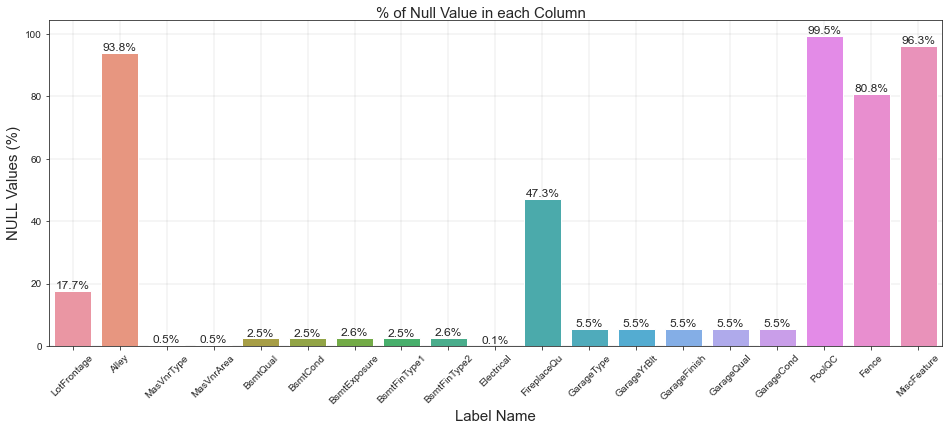

In [8]:
# Plot bar chart for Null Values columns
axfs=15 # Size variable

sb.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)
fig.suptitle("% of Null Value in each Column", size=axfs, y=0.91)

bp = sb.barplot(x = 'column_name', y = 'perc_null_value', data=perc_Null_df, ax=ax)
bp.bar_label(bp.containers[0],fmt='%.1f%%', size=axfs-3)
bp.set_ylabel('NULL Values (%)', size = axfs)
bp.set_xlabel('Label Name', size = axfs)
ax.grid(b=True, which='major', color='black', linewidth=0.075)

locs, labels = plt.xticks()
plt.setp(labels, rotation=45)

plt.show()

In [9]:
# Let's see the values of FireplaceQU 

# FireplaceQu: Fireplace quality
#        Ex	Excellent - Exceptional Masonry Fireplace
#        Gd	Good - Masonry Fireplace in main level
#        TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
#        Fa	Fair - Prefabricated Fireplace in basement
#        Po	Poor - Ben Franklin Stove
#        NA	No Fireplace

df['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

<hr>

#### Observation:

* The four variables namely `Alley`, `PoolQC`, `Fence` and `MiscFeature` are having more than 80% of Null Values. We can certainly drop these variables.

* The variable `FireplaceQu` is having 47% of Null Values. We can also drop the variable from the DataFrame.

<hr>

__Dropping the variables at stated above__

In [10]:
df = df.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


__Check any Unique value column, if present__

In [11]:
# Let's check if any DataFrame column has unique value
df.loc[:,df.apply(pd.Series.nunique) == 1].count()

Series([], dtype: int64)

<hr>

#### Observation:

* There is no unique value column present in the filtered DataFrame.

* __In the DataFrame `SalePrice` is the target variable.__

<hr>

In [12]:
# Display the Info of the Raw Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

Definition of variable attibutes is given in the definition file. One must go through the definition file for further clarity. Here the target variable is `SalePrice`.

<hr>

__Display the Target Feature: SalePrice__

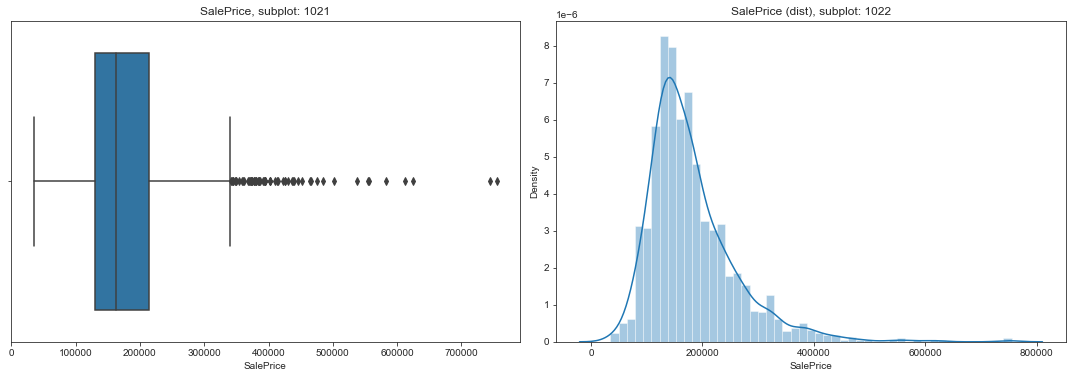

In [13]:
# Box Plot & Distplot of Target Feature
target_col = ['SalePrice']
a = 10  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in target_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sb.boxplot(df[i])
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sb.distplot(df[i])
    c = c + 1
    
plt.tight_layout()
plt.show();

Target variable contains outliers in the data also it is right skewed - not normally distributed. We will take log transformation on the target variable.

__qq Plot of Target Feature: SalePrice__

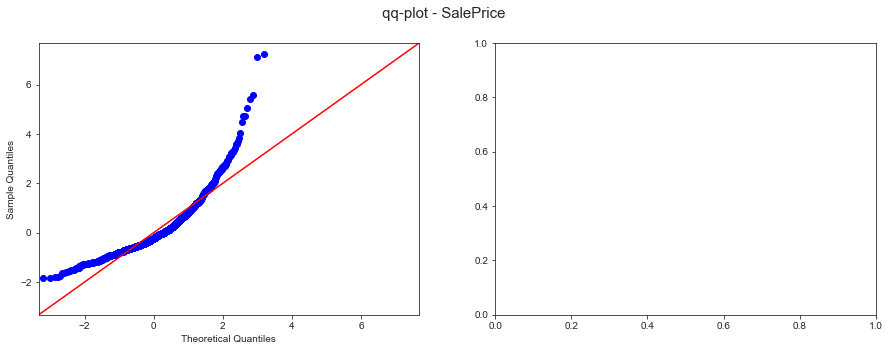

In [14]:
import statsmodels.api as sm
from scipy import stats

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot - SalePrice ", fontsize= 15)

sm.qqplot(df['SalePrice'], stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])

# sb.distplot(df['SalePrice'], kde = True, hist=True, ax = ax[1])
plt.show()

__Log Transformation of Target Feature: SalePrice__

In [15]:
df['SalePrice_log'] = np.log(df['SalePrice'])

In [16]:
# Drop the SalePrice from DataFrame & keep a copy of SalePrice into a variable
saleprice = df[['SalePrice']].copy()
df = df.drop('SalePrice',axis=1) # removing the orignal variable

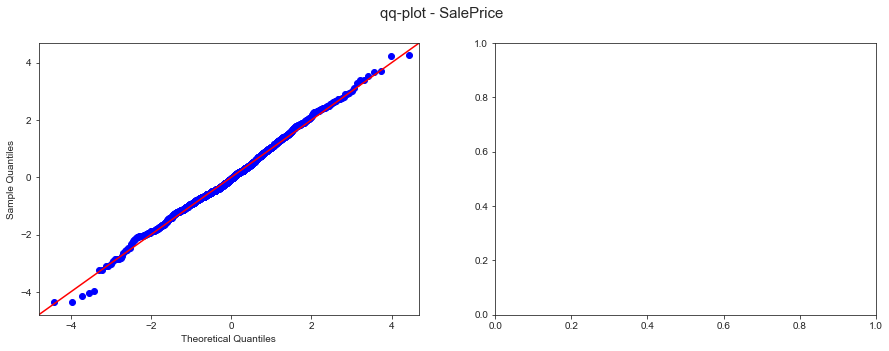

In [17]:
# qq Plot of Log Transformed Target Feature: SalePrice_log
    
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot - SalePrice ", fontsize= 15)

sm.qqplot(df['SalePrice_log'] , stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
# sb.distplot(df['SalePrice_log'] , kde = True, hist=True, ax = ax[1])
plt.show()

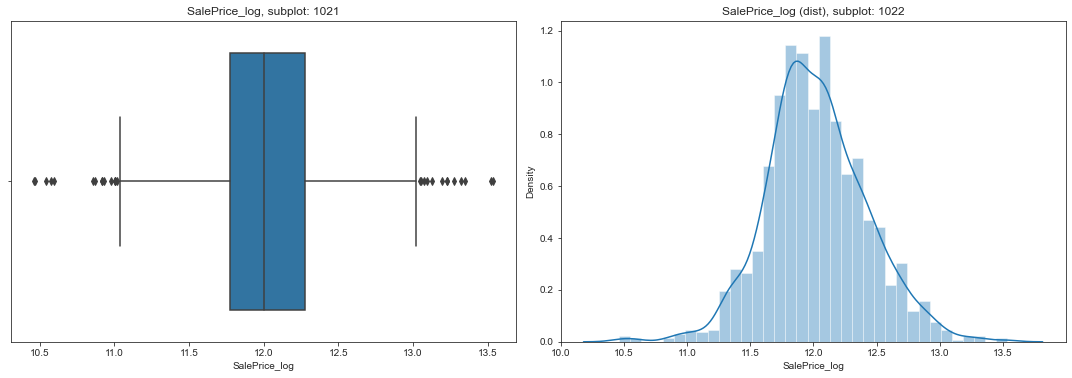

In [18]:
# Box Plot & Distplot of Log transformed Target Feature

target_col = ['SalePrice_log']
a = 10  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in target_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sb.boxplot(df[i])
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sb.distplot(df[i])
    c = c + 1

plt.tight_layout()
plt.show()

<hr>

#### Observation:

* Log transformation of `SalePrice` convert rightskewed data to normal distribution. It has fullfill one of the assumption (normal distribution) of linear modelling.

<hr>

In [19]:
# Dispaly the DataFrame
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice_log
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,12.429216


<hr>

### 1.3 Categorical Variable EDA - For User Interpretation & Data Cleaning

For the EDA purpose & user understandable naming, we will encode some categorical variable numerical values to interpretable values. By looking at Data Definition file, some of categorical variable is having the numerical type. During this process we will perform type conversion, do cleaning as & when required.

In [20]:
# Define function for categorial value encoding
def func_var_map(temp_dict, var_name, df):
    
    
    df[[var_name]] = df[[var_name]].apply(lambda x: x.map(temp_dict))
    
    per_count=round(df[var_name].value_counts() / df[var_name].value_counts().sum() *100,2)
    
    print("Mapping categorical variable: ", var_name, ' (Total counts are in %.)\n')
    print(per_count)
    
    return df[[var_name]]
    

In [21]:
# Define function for encoded categorial value bar plot & box plot

def func_var_map_plot(fgx, fgy, varx, vary, df, rot,title_name):
        
    fig, axs = plt.subplots(fgx,fgy, figsize=(20,7))
    fig.suptitle(title_name, size=18, y=0.95)
      
    plt.subplot(fgx,fgy,1)
    # plotting a vertical box plot
    ax_bxp = sb.boxplot( x = varx, y = vary, data = df)
    ax_bxp.set_xticklabels(ax_bxp.get_xticklabels(),rotation=rot, fontsize=14)
    ax_bxp.set_title('Box Plot')
    
    plt.subplot(fgx,fgy,2)
    # plotting a bar plot
    ax_bar = sb.barplot( x = varx, y = vary, data = df, estimator=sum)
    ax_bar.set_xticklabels(ax_bar.get_xticklabels(),rotation=rot, fontsize=14)
    ax_bar.set_title('[Bar Plot-sum estimator]')
    

plt.show()

<hr> 
Let's map the `MSSubClass` and display the info.

In [22]:
# Define the dictionary

temp_dict = {20:'1-STORY 1946 & NEWER ALL STYLES', 30:'1-STORY 1945 & OLDER', 40:'1-STORY W/FINISHED ATTIC ALL AGES',
             45:'1-1/2 STORY-UNFINISHED ALL AGES', 50:'1-1/2 STORY FINISHED ALL AGES', 60:'2-STORY 1946 & NEWER',
             70:'2-STORY 1945 & OLDER', 75:'2-1/2 STORY ALL AGES', 80:'SPLIT OR MULTI-LEVEL', 85: 'SPLIT FOYER',
             90:'DUPLEX-ALL STYLES AND AGES', 120:'1-STORY PUD-1946 & NEWER',
             150:'1-1/2 STORY PUD-ALL AGES', 160:'2-STORY PUD-1946 & NEWER',
             180:'PUD - MULTILEVEL-INCL SPLIT LEV/FOYER', 190:'2 FAMILY CONVERSION-ALL STYLES AND AGES'}

var_name='MSSubClass'

# Call function make categorial value encoding
df[[var_name]] = func_var_map(temp_dict, var_name, df)

Mapping categorical variable:  MSSubClass  (Total counts are in %.)

1-STORY 1946 & NEWER ALL STYLES            36.71
2-STORY 1946 & NEWER                       20.48
1-1/2 STORY FINISHED ALL AGES               9.86
1-STORY PUD-1946 & NEWER                    5.96
1-STORY 1945 & OLDER                        4.73
2-STORY PUD-1946 & NEWER                    4.32
2-STORY 1945 & OLDER                        4.11
SPLIT OR MULTI-LEVEL                        3.97
DUPLEX-ALL STYLES AND AGES                  3.56
2 FAMILY CONVERSION-ALL STYLES AND AGES     2.05
SPLIT FOYER                                 1.37
2-1/2 STORY ALL AGES                        1.10
1-1/2 STORY-UNFINISHED ALL AGES             0.82
PUD - MULTILEVEL-INCL SPLIT LEV/FOYER       0.68
1-STORY W/FINISHED ATTIC ALL AGES           0.27
Name: MSSubClass, dtype: float64


<hr>

#### Observation:

* The three variable attributes having the maximum percentage contibution, namely `1-STORY 1946 & NEWER ALL STYLES` (37%), `2-STORY 1946 & NEWER` (20%), & `1-1/2 STORY FINISHED ALL AGES` (10%).

<hr>


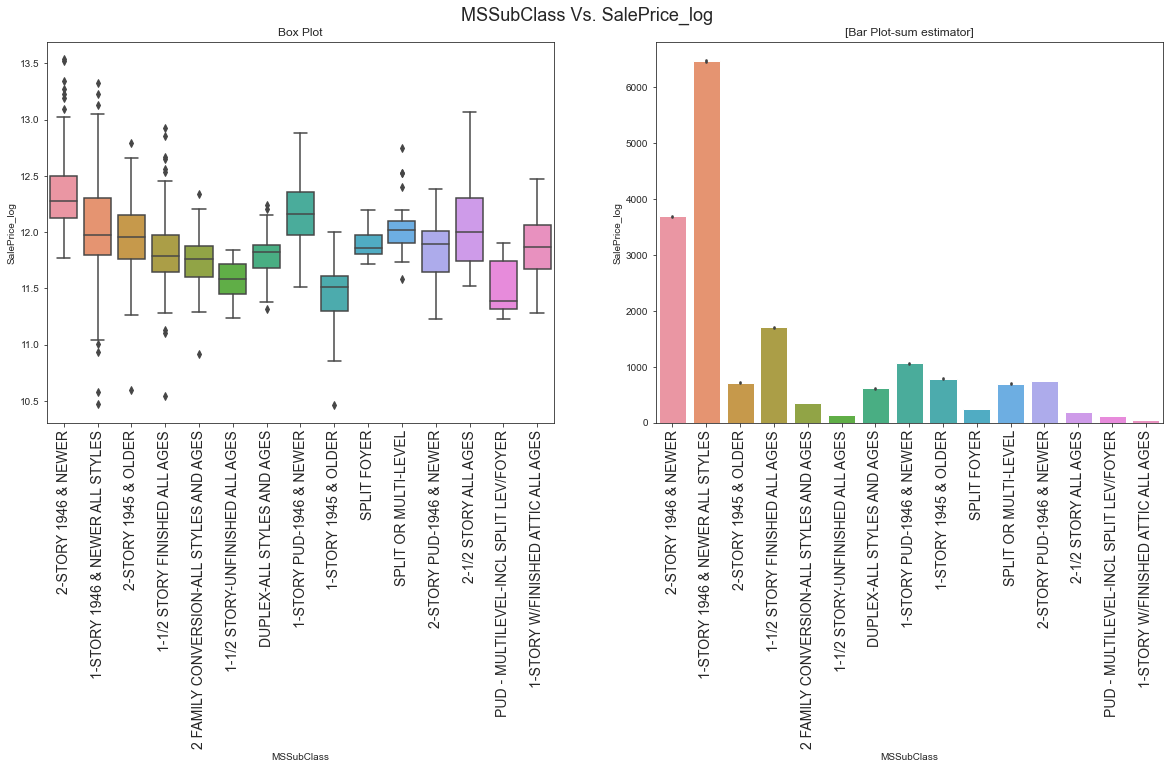

In [23]:
# Call function to make the plot
title_name = str(var_name) + ' Vs. SalePrice_log'

func_var_map_plot(1, 2,var_name, 'SalePrice_log', df, 90, title_name)

<hr>

#### Observation:

* The maximum contributing attributes to the sale price are `1-STORY 1946 & NEWER ALL STYLES `, `2-STORY 1946 & NEWER`, `1-1/2 STORY FINISHED ALL AGES` & `2-STORY PUD-1946 & NEWER `.

* Mean & STD of the categorical variable `MSSubClass` is different/varying with `SalePrice_log`, thus it can be admissible for linear modelling.

<hr>

<hr> 

Let's map the `MSZoning` and display the info.

In [24]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [25]:
# Define the dictionary
temp_dict = {'A':'Agriculture','C (all)':'Commercial','FV':'Floating Village Residential',
             'I':'Industrial','RH':'Residential High Density','RL':'Residential Low Density',
             'RP':'Residential Low Density Park','RM':'Residential Medium Density'}


var_name='MSZoning'

# Call function make categorial value encoding
df[[var_name]] = func_var_map(temp_dict, var_name, df)

Mapping categorical variable:  MSZoning  (Total counts are in %.)

Residential Low Density         78.84
Residential Medium Density      14.93
Floating Village Residential     4.45
Residential High Density         1.10
Commercial                       0.68
Name: MSZoning, dtype: float64


<hr>

#### Observation:

* The two variable attributes having the maximum percentage contibution, namely `Residential Low Density` (79%) & `Residential Medium Density` (15%).

<hr>



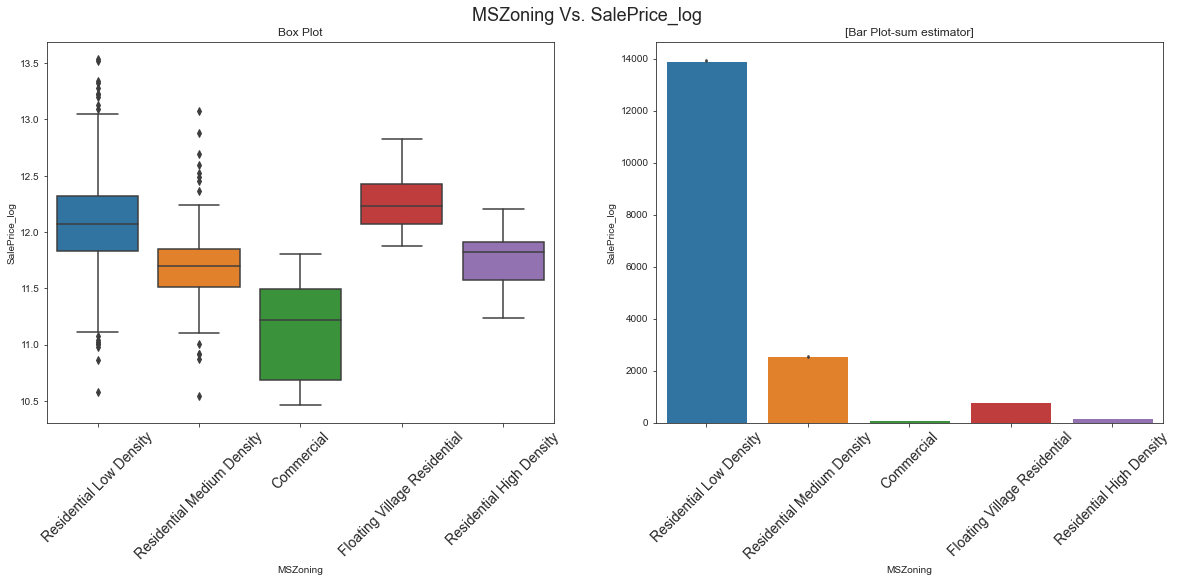

In [26]:
# Call function to make the plot
title_name = str(var_name) + ' Vs. SalePrice_log'

func_var_map_plot(1, 2,var_name, 'SalePrice_log', df, 45, title_name)

<hr>

#### Observation:

* The maximum contributing attribute to the sale price is  `Residential Low Density `, whereas median of `Floating Village Residential` is the highest.

* Mean & STD of the categorical variable `MSZoning` is different/varying with `SalePrice_log`.

<hr>


<hr> 

Let's map the `LotShape` and display the info.

In [27]:
# Define the dictionary

temp_dict = {'Reg':'Regular', 'IR1':'Slightly irregular', 'IR2':'Moderately Irregular', 'IR3':'Irregular'}

var_name='LotShape'

# Call function make categorial value encoding
df[[var_name]] = func_var_map(temp_dict, var_name, df)

Mapping categorical variable:  LotShape  (Total counts are in %.)

Regular                 63.36
Slightly irregular      33.15
Moderately Irregular     2.81
Irregular                0.68
Name: LotShape, dtype: float64


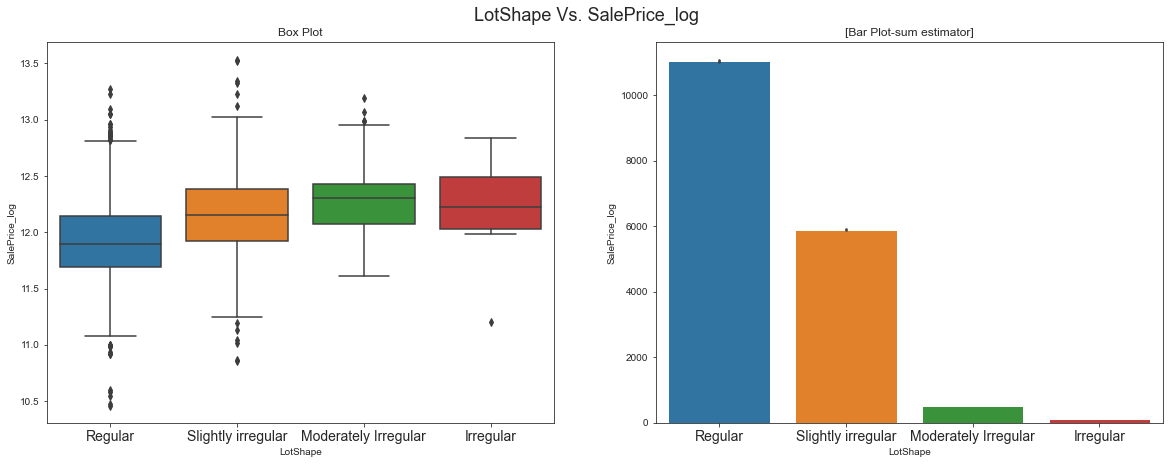

In [28]:
# Call function to make the plot
title_name = str(var_name) + ' Vs. SalePrice_log'

func_var_map_plot(1, 2,var_name, 'SalePrice_log', df, 0, title_name)

<hr>

#### Observation:

* The two variable attributes having the maximum percentage contibution, namely `Regular` (63%) & `Slightly irregular` (33%), whereas median `SalePrice_log` is highest of `Moderately Irregular`.

* Mean & STD of the categorical variable `LotShape` is different/varying with `SalePrice_log`.

<hr>


<hr> 

Let's map the `LandContour` and display the info.

In [29]:
# Define the dictionary

temp_dict = {'Lvl':'Near Flat/Level', 'Bnk':'Banked', 'HLS':'Hillside', 'Low':'Depression'}

var_name='LandContour'

# Call function make categorial value encoding
df[[var_name]] = func_var_map(temp_dict, var_name, df)

Mapping categorical variable:  LandContour  (Total counts are in %.)

Near Flat/Level    89.79
Banked              4.32
Hillside            3.42
Depression          2.47
Name: LandContour, dtype: float64


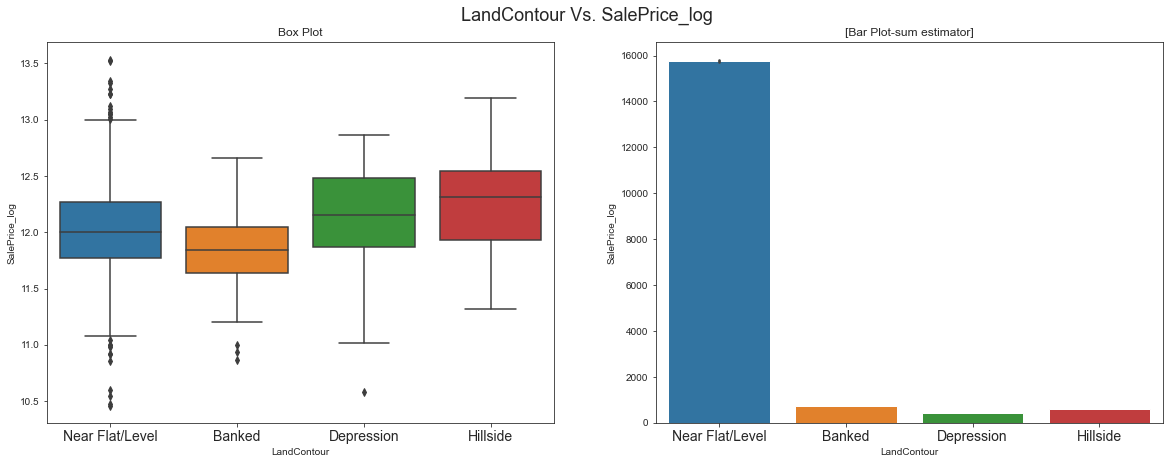

In [30]:
# Call function to make the plot
title_name = str(var_name) + ' Vs. SalePrice_log'

func_var_map_plot(1, 2,var_name, 'SalePrice_log', df, 0, title_name)

<hr>

#### Observation:

* Contribution is highest from the `Near Flat` to the `SalePrice_log` but the cost of `Depression` & `Hillside` landscape are higher than other landscape.

* Mean & STD of the categorical variable `LandContour` is different/varying with `SalePrice_log`.

<hr>

<hr> 

Let's map the `OverallQual` and display the info.

Mapping categorical variable:  OverallQual  (Total counts are in %.)

Average           27.19
Above Average     25.62
Good              21.85
Very Good         11.51
Below Average      7.95
Excellent          2.95
Fair               1.37
Very Excellent     1.23
Poor               0.21
Very Poor          0.14
Name: OverallQual, dtype: float64


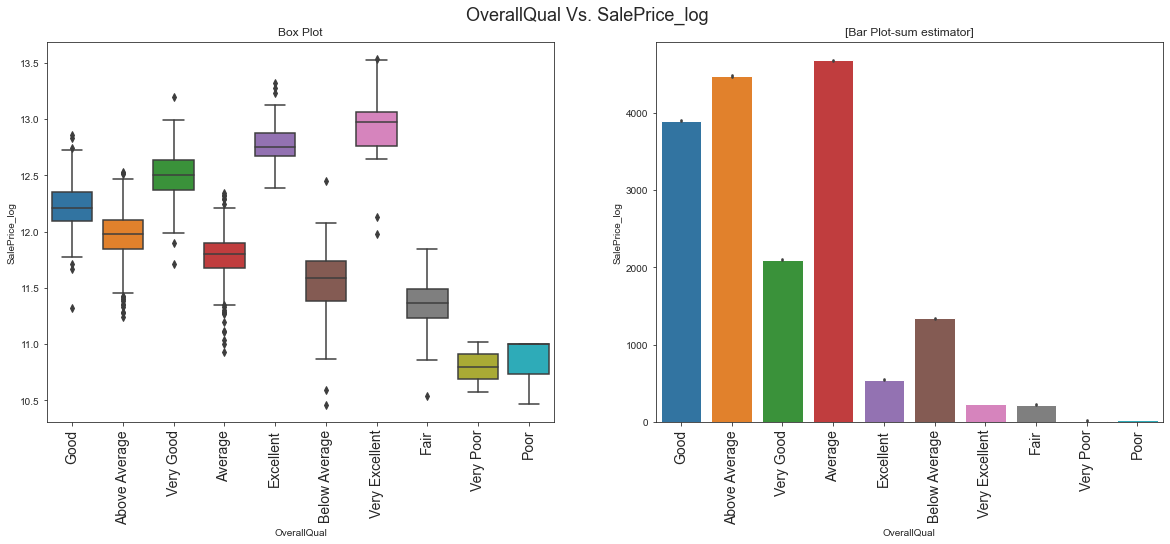

In [31]:
# Define the dictionary

temp_dict = { 10:'Very Excellent', 9: 'Excellent', 8:'Very Good', 7:'Good',6:'Above Average',
             5:'Average', 4:'Below Average',3:'Fair', 2:'Poor', 1:'Very Poor'}

var_name='OverallQual'

# Call function make categorial value encoding
df[[var_name]] = func_var_map(temp_dict, var_name, df)

# Call function to make the plot
title_name = str(var_name) + ' Vs. SalePrice_log'

func_var_map_plot(1, 2,var_name, 'SalePrice_log', df, 90, title_name)

<hr>

#### Observation:

* `SalePrice_log` for the `Very Excellent`, `Excellent` & `Very Good` are comparitively high, which is logical, but most of the income coming from  `Good` to `Average` category.

* Mean & STD of the categorical variable `OverallQual` is different/varying with `SalePrice_log`. However a trend can be observed in the `OverallQual` with `SalePrice_log` for some set of `OverallQual` attributes.

<hr>


<hr> 

Let's map the `OverallCond` and display the info.

Mapping categorical variable:  OverallCond  (Total counts are in %.)

Average          56.23
Above Average    17.26
Good             14.04
Very Good         4.93
Below Average     3.90
Fair              1.71
Excellent         1.51
Poor              0.34
Very Poor         0.07
Name: OverallCond, dtype: float64


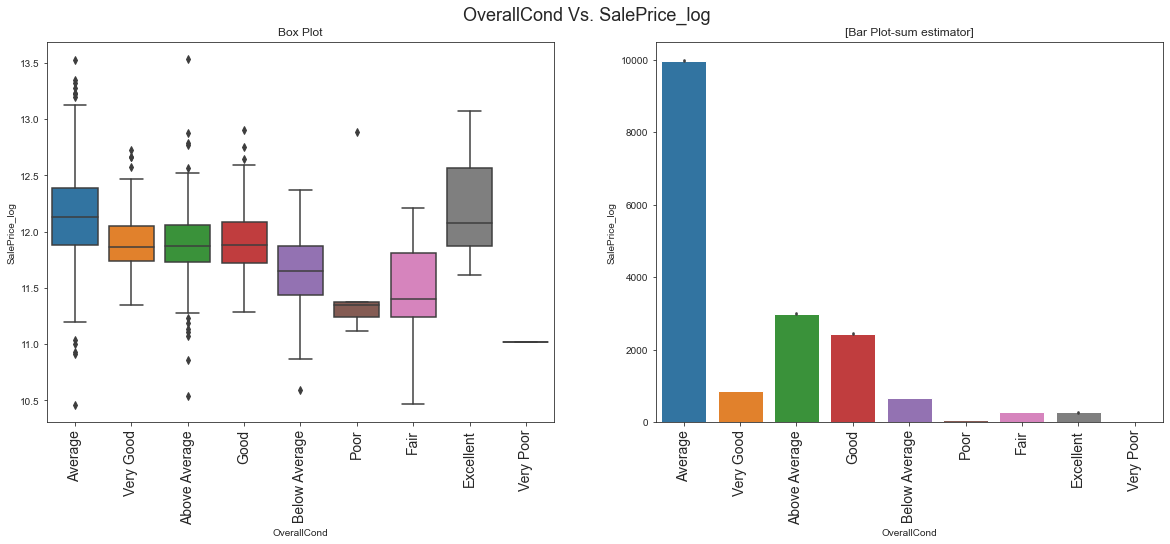

In [32]:
# Define the dictionary

temp_dict = { 10:'Very Excellent', 9: 'Excellent', 8:'Very Good', 7:'Good',6:'Above Average',
             5:'Average', 4:'Below Average',3:'Fair', 2:'Poor', 1:'Very Poor'}

var_name='OverallCond'

# Call function make categorial value encoding
df[[var_name]] = func_var_map(temp_dict, var_name, df)

# Call function to make the plot
title_name = str(var_name) + ' Vs. SalePrice_log'

func_var_map_plot(1, 2,var_name, 'SalePrice_log', df, 90, title_name)

<hr>

#### Observation:

* By looking at both the variables of `OverallQual` & `OverallCond`, they are having different representation. `OverallQual` is showing good record. So we should drop the variable `OverallCond`.

<hr>


__Dropping the variables `OverallCond` at stated above__

In [33]:
df = df.drop(['OverallCond'], axis=1)

<hr> 

Let's map the `Foundation` and plot the same.

Mapping categorical variable:  Foundation  (Total counts are in %.)

Poured Contrete    44.32
Cinder Block       43.42
Brick & Tile       10.00
Slab                1.64
Stone               0.41
Wood                0.21
Name: Foundation, dtype: float64


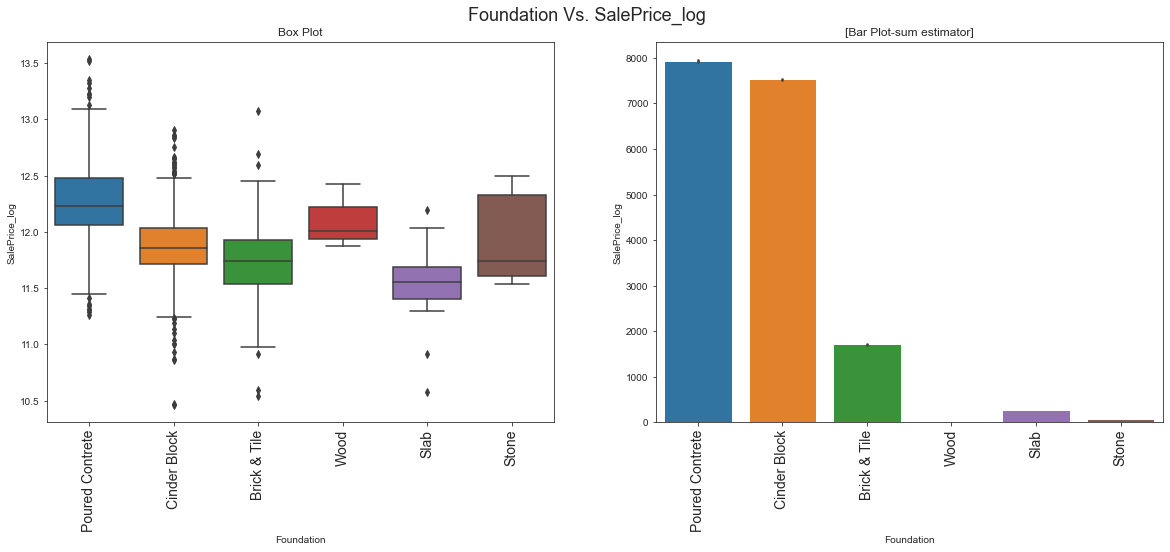

In [34]:
# Define the dictionary

temp_dict = {'BrkTil':'Brick & Tile', 'CBlock': 'Cinder Block', 'PConc':'Poured Contrete', 'Slab':'Slab',
             'Stone':'Stone', 'Wood':'Wood'}

var_name='Foundation'

# Call function make categorial value encoding
df[[var_name]] = func_var_map(temp_dict, var_name, df)

# Call function to make the plot
title_name = str(var_name) + ' Vs. SalePrice_log'

func_var_map_plot(1, 2,var_name, 'SalePrice_log', df, 90, title_name)

<hr>

#### Observation:

* `Poured Contrete` & `Cinder Block` are the major contibutor.

* Mean & STD of the categorical variable `Foundation` is different/varying with `SalePrice_log`.

<hr>


<hr> 

Let's plot & check the `BsmtQual` & `BsmtCond`

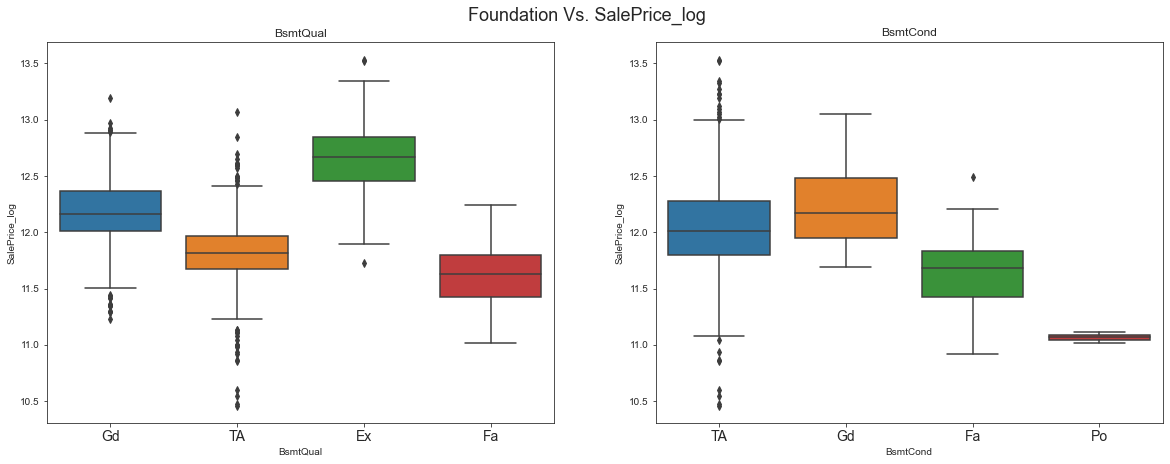

In [35]:
fig, axs = plt.subplots(1,2, figsize=(20,7))
fig.suptitle(title_name, size=18, y=0.95)
      
plt.subplot(1,2,1)
# plotting a vertical box plot
ax1_bxp = sb.boxplot( x = 'BsmtQual', y = 'SalePrice_log', data = df)
ax1_bxp.set_xticklabels(ax1_bxp.get_xticklabels(),rotation=0, fontsize=14)
ax1_bxp.set_title('BsmtQual')
    
plt.subplot(1,2,2)
# plotting a vertical box plot
ax2_bxp = sb.boxplot( x = 'BsmtCond', y = 'SalePrice_log', data = df)
ax2_bxp.set_xticklabels(ax2_bxp.get_xticklabels(),rotation=0, fontsize=14)
ax2_bxp.set_title('BsmtCond')
    
plt.show()

In [36]:
# Check the Values of 'BsmtCond' for the Null Values of 'BsmtQual'
df[df['BsmtQual'].isnull()]['BsmtCond']

17      NaN
39      NaN
90      NaN
102     NaN
156     NaN
182     NaN
259     NaN
342     NaN
362     NaN
371     NaN
392     NaN
520     NaN
532     NaN
533     NaN
553     NaN
646     NaN
705     NaN
736     NaN
749     NaN
778     NaN
868     NaN
894     NaN
897     NaN
984     NaN
1000    NaN
1011    NaN
1035    NaN
1045    NaN
1048    NaN
1049    NaN
1090    NaN
1179    NaN
1216    NaN
1218    NaN
1232    NaN
1321    NaN
1412    NaN
Name: BsmtCond, dtype: object

<hr>

#### Observation:

* All of the values of `BsmtCond` for the Null Values of `BsmtQual` are NULL, We can fill the these rows & also for the rest of the columns.

* Mean & STD of the both categorical variables `BsmtCond` & `BsmtQual` are different/varying with `SalePrice_log`.

<hr>

__Display the remaining columns having Null Values__

In [37]:
# Remaining list of Columns having the Null Values
bool_Null_clmn = df.columns[df.isnull().sum()>0]
df[bool_Null_clmn].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrType    1452 non-null   object 
 2   MasVnrArea    1452 non-null   float64
 3   BsmtQual      1423 non-null   object 
 4   BsmtCond      1423 non-null   object 
 5   BsmtExposure  1422 non-null   object 
 6   BsmtFinType1  1423 non-null   object 
 7   BsmtFinType2  1422 non-null   object 
 8   Electrical    1459 non-null   object 
 9   GarageType    1379 non-null   object 
 10  GarageYrBlt   1379 non-null   float64
 11  GarageFinish  1379 non-null   object 
 12  GarageQual    1379 non-null   object 
 13  GarageCond    1379 non-null   object 
dtypes: float64(3), object(11)
memory usage: 159.8+ KB


__Fill the rows for the missing values__

In [38]:
# List the Categorical & Continuous Variable having Null Values
list_cat = df[bool_Null_clmn].select_dtypes(include=np.object).columns.tolist()
list_cont = df[bool_Null_clmn].select_dtypes(include=np.number).columns.tolist()

In [39]:
# Fill the Categorical data columns with NoData
for i in list_cat:
    df[i] = df[i].fillna('NoData')

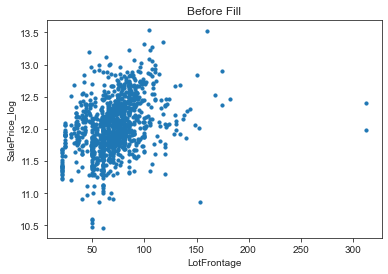

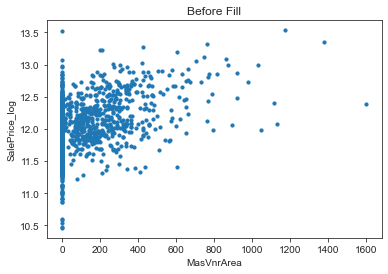

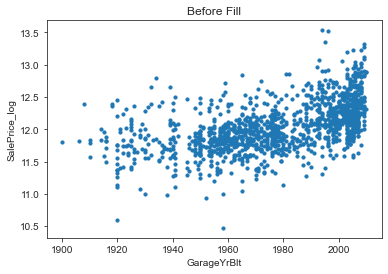

In [40]:
# Draw a scatter plot of list_cont before fill
for i in list_cont:
    df.plot.scatter(x = str(i), y = 'SalePrice_log', s = 10, title='Before Fill')

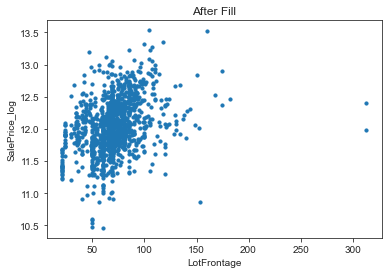

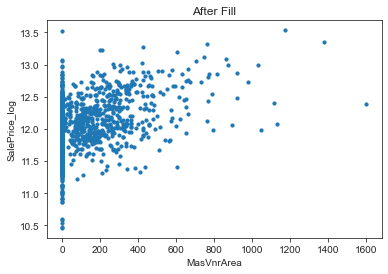

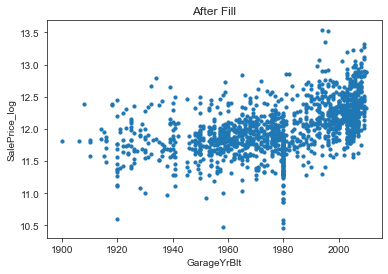

In [41]:
# Fill the Numerical data columns with Median Value
for i in list_cont:
    df[i] = df[i].fillna(df[i].median())

# Draw a scatter plot of list_cont after fill
for i in list_cont:
    df.plot.scatter(x = str(i), y = 'SalePrice_log', s = 10, title='After Fill')

<hr>

#### Observation:

* Comparing both before & after fillna of numerical values, it is ok to accept to fill Null with median values.

<hr>

In [42]:
# # Remove the NULL values rows based on 'BsmtCond'
# df=df[~df['BsmtCond'].isnull()]

# # Remove the NULL values rows based on 'GarageType'
# df=df[~df['GarageType'].isnull()]

# # Remove the NULL values rows based on 'MasVnrType'
# df=df[~df['MasVnrType'].isnull()]

# # Remove the NULL values rows based on 'BsmtExposure'
# df=df[~df['BsmtExposure'].isnull()]

# # Remove the NULL values rows based on 'BsmtFinType2'
# df=df[~df['BsmtFinType2'].isnull()]

# # Remove the NULL values rows based on 'Electrical'
# df=df[~df['Electrical'].isnull()]

__Check the remaining Null Values in the DataFrame__

In [43]:
# Columns having the Null Values
bool_Null_clmn = df.columns[df.isnull().sum()>0]

# Calculate the % of Null value (>0) Columns & Convert it to DataFrame
perc_Null_df = pd.DataFrame(round(df[bool_Null_clmn].isnull().sum()/df.shape[0]*100,1))

# Display the Labels with its Percentage NULL Values
print(perc_Null_df)

Empty DataFrame
Columns: [0]
Index: []


<hr>

#### Observation:

* We don't have any columns & rows with Null value

<hr>

In [44]:
# Chck the shape of the DataFrame
df.shape

(1460, 74)

<hr> 

Let's continue with the categorical data analysis. Plot the Electrical system Vs SalePrice_log

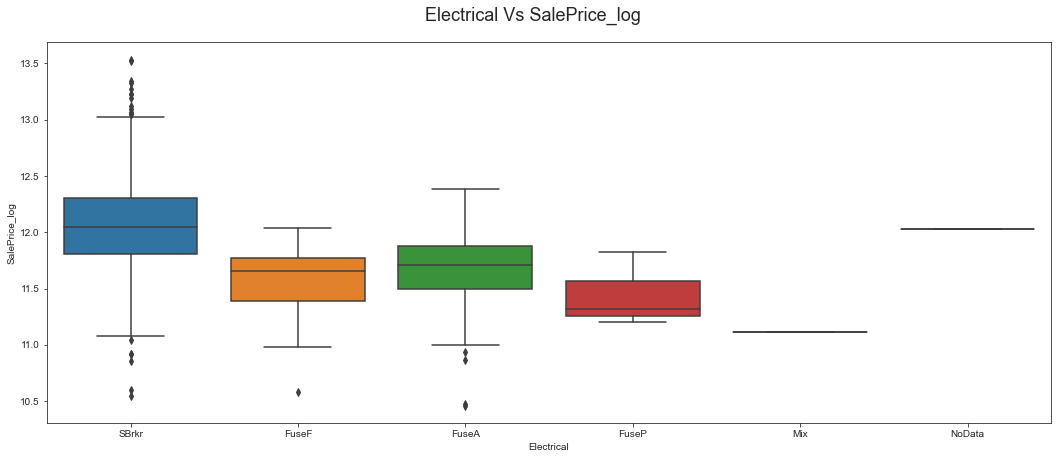

In [45]:
# Make Box plot

fig = plt.figure(figsize =(18, 7))
fig.suptitle('Electrical Vs SalePrice_log', size=18, y=0.95)

# plotting a vertical box plot with Academy and Age
ax = sb.boxplot( x = 'Electrical',y = 'SalePrice_log', data = df)

`Standard Circuit Breakers & Romex` is affecting the sale price.

<hr>

__Converting the categorical data columns from integer to string type__

Lets check headerlist of some of the variables.

In [46]:
var_list = ['BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 
            'BsmtHalfBath', 'FullBath', 'HalfBath',  'BedroomAbvGr', 'KitchenAbvGr']

In [47]:
df[var_list].head()

,BsmtFinSF1,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr
0,706,856,854,0,1710,1,0,2,1,3,1
1,978,1262,0,0,1262,0,1,2,0,3,1
2,486,920,866,0,1786,1,0,2,1,3,1
3,216,961,756,0,1717,1,0,1,0,3,1
4,655,1145,1053,0,2198,1,0,2,1,4,1


`LowQualFinSF`, `BsmtFullBath`, `BsmtHalfBath`, `FullBath`, `HalfBath`, `BedroomAbvGr` & `KitchenAbvGr` are categorical type data value. We therefor convert it from int64 to string type.

<hr>

__Analyse rest of the categorical data type with box plot__

In [48]:
# list the categorical data type
var_list2 = [ 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',  'BedroomAbvGr', 'KitchenAbvGr']

In [49]:
# Convert the type from int64 to string
df[var_list2] = df[var_list2].astype(str)

# Display the info
df[var_list2].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LowQualFinSF  1460 non-null   object
 1   BsmtFullBath  1460 non-null   object
 2   BsmtHalfBath  1460 non-null   object
 3   FullBath      1460 non-null   object
 4   HalfBath      1460 non-null   object
 5   BedroomAbvGr  1460 non-null   object
 6   KitchenAbvGr  1460 non-null   object
dtypes: object(7)
memory usage: 80.0+ KB


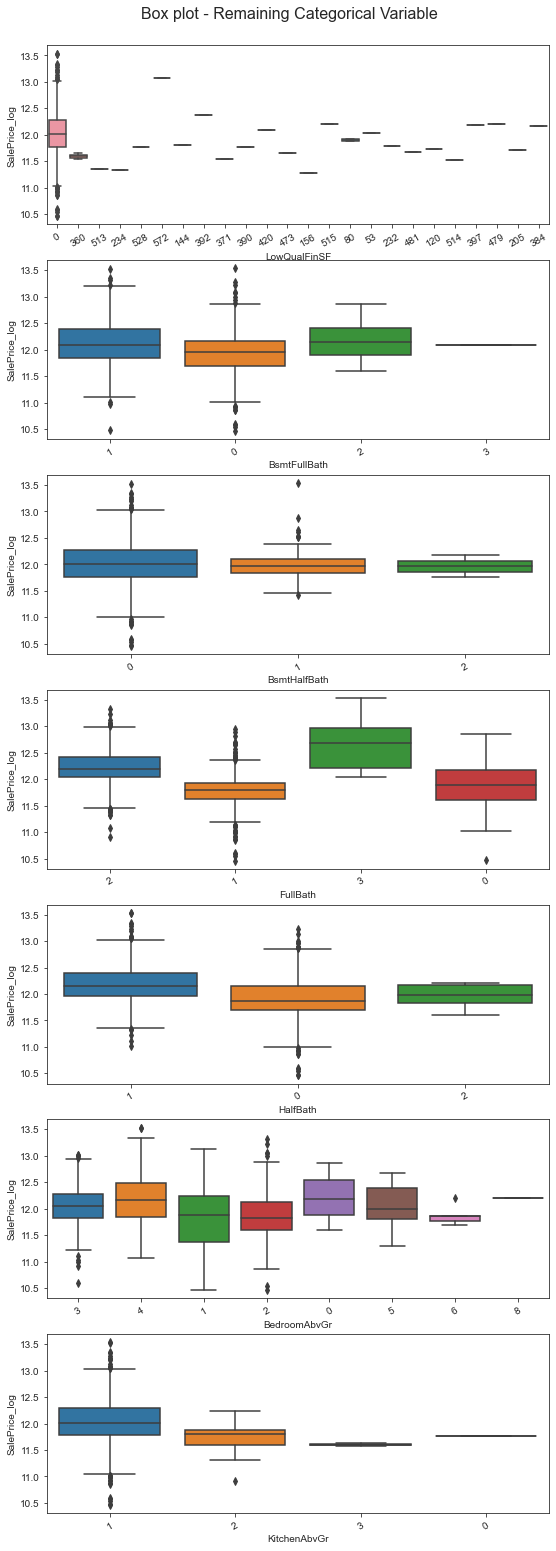

In [50]:
# Lets box plot the rest of the categorical data type as listed above
fig, axs = plt.subplots(7,2, figsize=(9,27))
fig.suptitle('Box plot - Remaining Categorical Variable', size=16, y=0.9)

cnt=1

for i in var_list2:
    plt.subplot(7,1,cnt)
    ax1_bxp = sb.boxplot( x = i, y = 'SalePrice_log', data = df)
    ax1_bxp.set_xticklabels(ax1_bxp.get_xticklabels(),rotation=30)
    #ax1_bxp.set_title(i)
    cnt+=1
plt.show()

<hr>

#### Observation:

* `LowQualFinSF` has issue with data integrity/quality and `BsmtHalfBath` is having no variation in the mean values of data attributes(). We should drop these two catgorical variable and othes are ok to accept.

<hr>

__Dropping `LowQualFinSF` and `BsmtHalfBath` from Dataframe__

In [51]:
df = df.drop(['LowQualFinSF', 'BsmtHalfBath'], axis=1)

__This completes the EDA of the categorical data set. Creation of dummy variables to be performed in the later part of program section.__

<hr>

### 1.4 Continuous Variable Analysis

In [52]:
# Display the statistical measures of continuous variable
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1460.0,69.86,22.03,21.00,60.00,69.0,79.00,313.00
LotArea,1460.0,10516.83,9981.26,1300.00,7553.50,9478.5,11601.50,215245.00
YearBuilt,1460.0,1971.27,30.20,1872.00,1954.00,1973.0,2000.00,2010.00
YearRemodAdd,1460.0,1984.87,20.65,1950.00,1967.00,1994.0,2004.00,2010.00
MasVnrArea,1460.0,103.12,180.73,0.00,0.00,0.0,164.25,1600.00
BsmtFinSF1,1460.0,443.64,456.10,0.00,0.00,383.5,712.25,5644.00
BsmtFinSF2,1460.0,46.55,161.32,0.00,0.00,0.0,0.00,1474.00
BsmtUnfSF,1460.0,567.24,441.87,0.00,223.00,477.5,808.00,2336.00
TotalBsmtSF,1460.0,1057.43,438.71,0.00,795.75,991.5,1298.25,6110.00
1stFlrSF,1460.0,1162.63,386.59,334.00,882.00,1087.0,1391.25,4692.00


<hr>

#### Observation:

* From the above table, the variable `LotArea` has big issue of outliers & this has to be removed.

* `MiscVal` has zero values for min, q1, q2, q3. Thus we must discard off `MiscVal`. 

<hr>

__Drop the `MiscVal` variable from DataFrame.__

In [53]:
df = df.drop(['MiscVal'], axis=1)

#### Checking  outliers  of `LotArea`

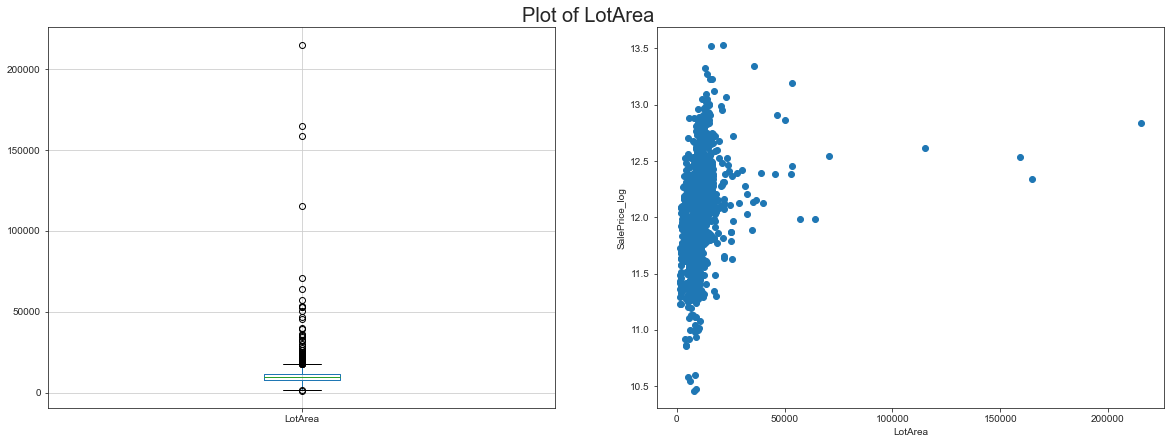

In [54]:
# Finding outliers in LotArea via Box plot & Scatter plot
fig, axs = plt.subplots(1,2, figsize=(20,7))
fig.suptitle("Plot of LotArea", size=20, y=0.92)

plt.subplot(1,2,1)
df.boxplot(column=['LotArea'])

plt.subplot(1,2,2)
axs[1].scatter(x = df['LotArea'], y = df['SalePrice_log'])
plt.xlabel("LotArea")
plt.ylabel("SalePrice_log")

plt.show()

In [55]:
# Filter the data based on quantile
q_low = df["LotArea"].quantile(0.01)
q_hi  = df["LotArea"].quantile(0.95)
df_filtered = df[(df["LotArea"] < q_hi) & (df["LotArea"] > q_low)]
print('Original data size: ',df.shape)
print('Filtered data size: ',df_filtered.shape)

Original data size:  (1460, 71)
Filtered data size:  (1370, 71)


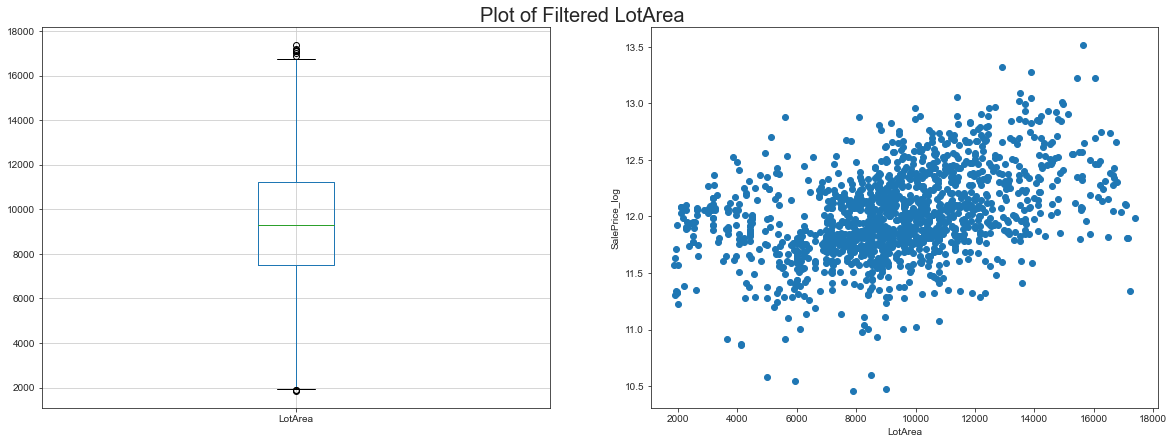

In [56]:
# Finding outliers in LotArea via Box plot & Scatter plot
fig, axs = plt.subplots(1,2, figsize=(20,7))
fig.suptitle("Plot of Filtered LotArea", size=20, y=0.92)

plt.subplot(1,2,1)
df_filtered.boxplot(column=['LotArea'])

plt.subplot(1,2,2)
axs[1].scatter(x = df_filtered['LotArea'], y = df_filtered['SalePrice_log'])
plt.xlabel("LotArea")
plt.ylabel("SalePrice_log")

plt.show()

In [57]:
# Create Dataframe of all Numerical Continuous Variables
total_cont_var = df_filtered.select_dtypes(include=np.number).columns.tolist()
num_data = df_filtered[total_cont_var]

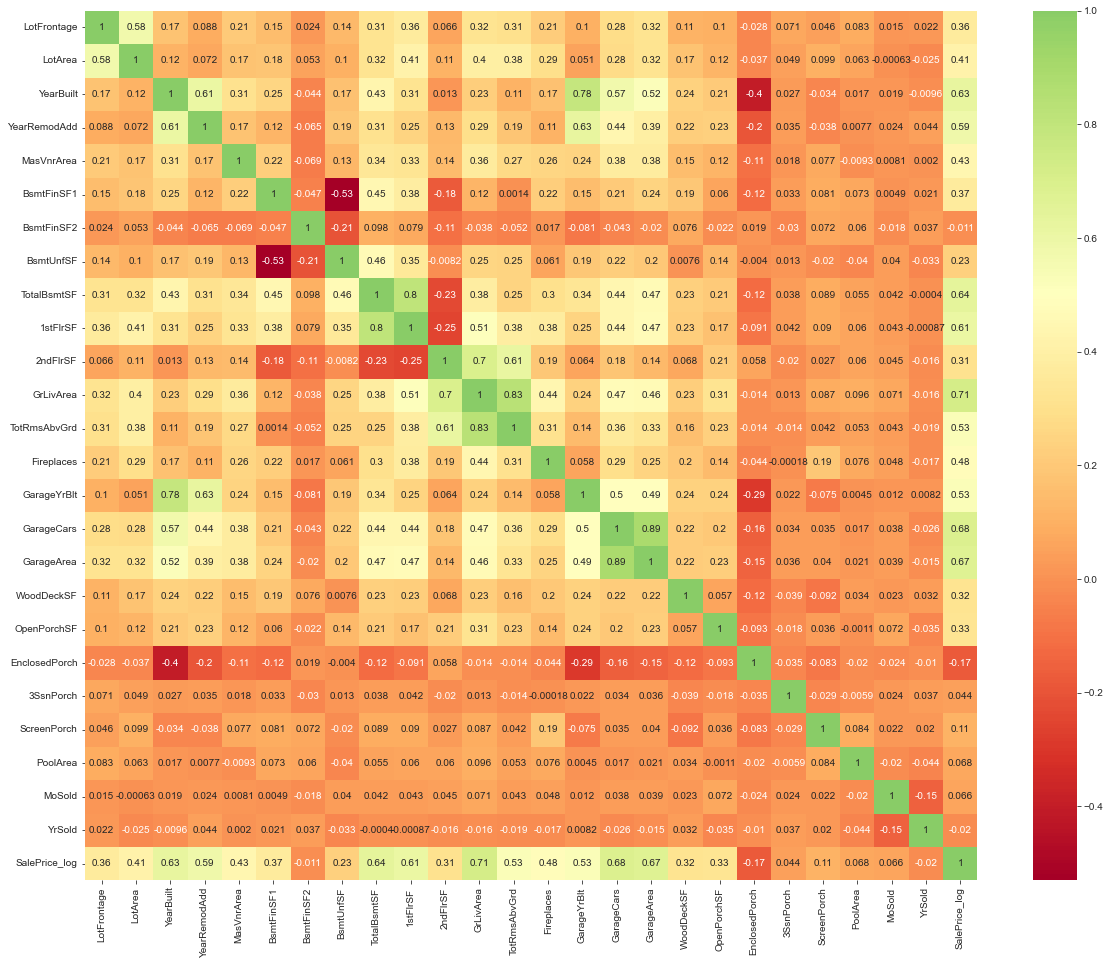

In [58]:
# Display the Correlation Matrix with Heat Map
plt.figure(figsize=(20,16))
corr = num_data.corr()
sb.heatmap(corr, annot=True, center=0.5, cmap="RdYlGn")
plt.show()

<hr>

#### Observation:

* Some of the following pairs are highly correlatable variable
    - `YearBuilt` & `GarageYrBlt` (78%)
    -  `TotalBsmtSF` & `1stFlrSF` (80%)
    -  `GrLivArea` & `TotRmsAbvGrd` (83%)
    -  `GarageCars` & `GarageArea` (89%)

<hr>

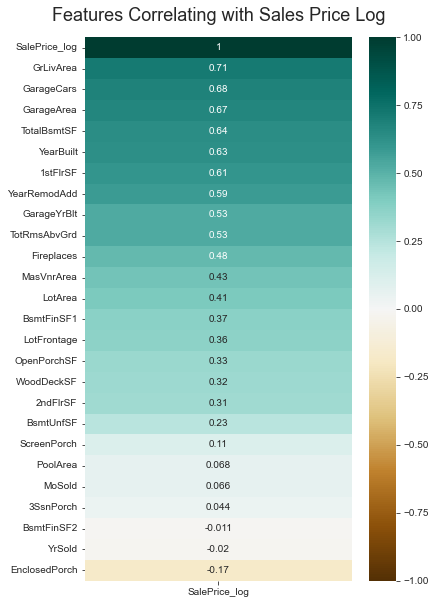

In [59]:
# Display the SalePrice_log correlation with other variable as a single column plot
plt.figure(figsize=(6, 10))

corr_df_by_SalePrice = corr[['SalePrice_log']].sort_values(by='SalePrice_log', ascending=False)
heatmap_outputvar = sb.heatmap(corr_df_by_SalePrice, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap_outputvar.set_title('Features Correlating with Sales Price Log', fontdict={'fontsize':18}, pad=16);

In [60]:
# Create a list having abs(correlaion value) more than a cut-off
cutoff = 0.3
list_corr = corr_df_by_SalePrice[abs(corr_df_by_SalePrice['SalePrice_log'])>cutoff].index
list_corr

Index(['SalePrice_log', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       'YearBuilt', '1stFlrSF', 'YearRemodAdd', 'GarageYrBlt', 'TotRmsAbvGrd',
       'Fireplaces', 'MasVnrArea', 'LotArea', 'BsmtFinSF1', 'LotFrontage',
       'OpenPorchSF', 'WoodDeckSF', '2ndFlrSF'],
      dtype='object')

<hr>

#### Observation:

* Top 12 variables are correlatable with `SalePrice_log` by 40% atleast.

* Top 17 variables are correlatable with `SalePrice_log` by 30% atleast.

<hr>

<hr>

__Display the Box plot for rest of the continuous variable__

In [61]:
# Listing the rest of the variables into a variable other than date data
cont_var = ['MasVnrArea',  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'GrLivArea',
           'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea','WoodDeckSF','OpenPorchSF', 'EnclosedPorch',
            '3SsnPorch', 'ScreenPorch', 'PoolArea']

# Length of the cont_var length
len_cont_var = len(cont_var)
print(len_cont_var)

18


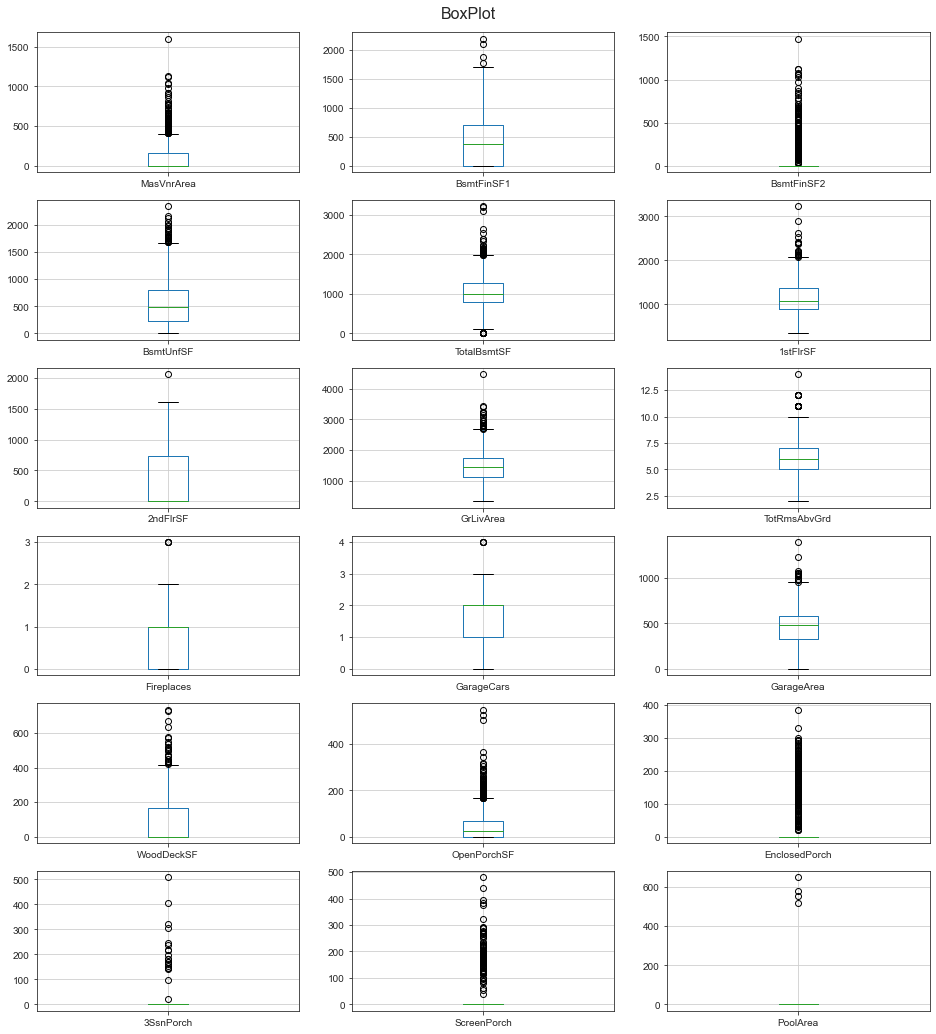

In [62]:
# Display the Box plot for cont_var
nrows=6
nclmn=3
cnt=0

fig, axes = plt.subplots(nrows, nclmn, figsize=(16, 18))
fig.suptitle('BoxPlot', size=16, y=0.9)

for i in range(nrows):
    for j in range(nclmn):
        #bp1 = axes[i,j].scatter(x = df_filtered[cont_var[cnt]], y = df_filtered['SalePrice_log'])
        plt.subplot(nrows,nclmn,cnt+1)
        df_filtered.boxplot(column=cont_var[cnt])
        cnt+=1


We have outliers and some suspected insignificant variable in rest of the continuous variable, we will see the effect and try to eliminate those varibales in coming steps after futher analysis.

#### Skewness in the numerical features

In [63]:
from scipy.stats import skew 
skew_in_vars = num_data.iloc[:,:-1].apply(lambda x: skew(x))
skew_in_vars.sort_values(ascending=False)

PoolArea         18.615952
3SsnPorch        11.091757
BsmtFinSF2        4.411372
ScreenPorch       4.133095
EnclosedPorch     2.838562
MasVnrArea        2.619279
OpenPorchSF       2.357381
WoodDeckSF        1.440294
1stFlrSF          0.938491
BsmtUnfSF         0.931697
GrLivArea         0.883331
2ndFlrSF          0.784250
BsmtFinSF1        0.749720
LotFrontage       0.695740
Fireplaces        0.659404
TotRmsAbvGrd      0.652665
TotalBsmtSF       0.512788
MoSold            0.217440
YrSold            0.098240
GarageArea        0.039394
LotArea          -0.048823
GarageCars       -0.343610
YearRemodAdd     -0.528861
YearBuilt        -0.606896
GarageYrBlt      -0.698350
dtype: float64

In [64]:
len(skew_in_vars)

25

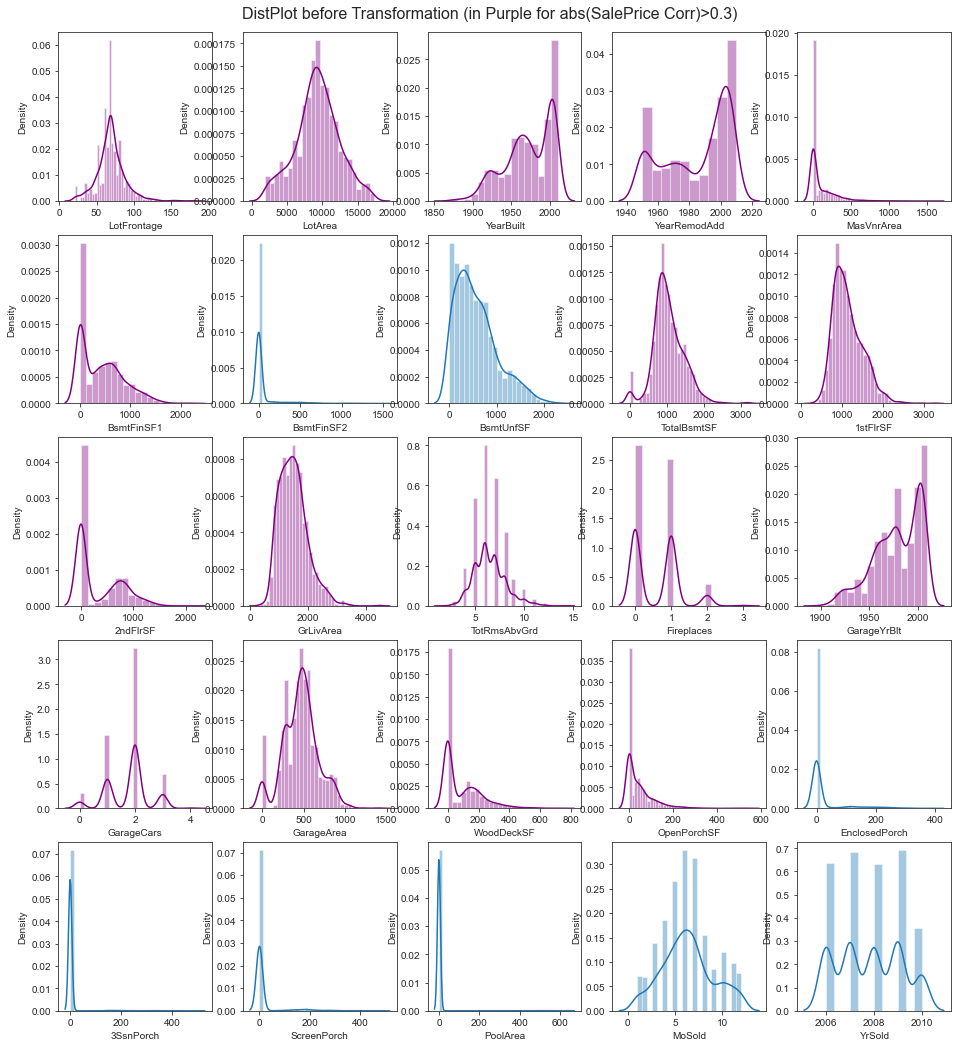

In [65]:
# Display the histogram plot of each continuos variable
nrows=5
nclmn=5
cnt=0
title_name = 'DistPlot before Transformation (in Purple for abs(SalePrice Corr)>'+str(cutoff)+')'
fig, axes = plt.subplots(nrows, nclmn, figsize=(16, 18))
fig.suptitle(title_name, size=16, y=0.9)

for i in range(nrows):
    for j in range(nclmn):
        plt.subplot(nrows,nclmn,cnt+1)
        if num_data.columns[cnt] in list_corr:
            sb.distplot(num_data.iloc[:,cnt],color='purple')
        else:
            sb.distplot(num_data.iloc[:,cnt])  
        cnt+=1

In [66]:
# Filter the high skewed data 
high_skew = skew_in_vars[skew_in_vars > 0.5]
skew_index = high_skew.index
print(skew_index)
print('No. of Skewed Data(>0.5) = ', len(skew_index))

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea'],
      dtype='object')
No. of Skewed Data(>0.5) =  17


#### Transforming the X- Feature (Log tranformation)

In [67]:
for i in skew_index:
    num_data[i] = np.log1p(num_data[i])

In [68]:
num_data.apply(lambda x: skew(x)).sort_values(ascending=False)

PoolArea         18.430092
3SsnPorch         8.239889
ScreenPorch       3.179513
BsmtFinSF2        2.587344
EnclosedPorch     2.084874
MasVnrArea        0.507128
2ndFlrSF          0.321507
MoSold            0.217440
Fireplaces        0.209067
WoodDeckSF        0.160330
YrSold            0.098240
1stFlrSF          0.059931
SalePrice_log     0.050302
GarageArea        0.039394
OpenPorchSF      -0.027463
LotArea          -0.048823
TotRmsAbvGrd     -0.065916
GrLivArea        -0.107423
GarageCars       -0.343610
YearRemodAdd     -0.528861
BsmtFinSF1       -0.598549
YearBuilt        -0.606896
GarageYrBlt      -0.698350
LotFrontage      -0.969451
BsmtUnfSF        -2.210672
TotalBsmtSF      -5.120680
dtype: float64

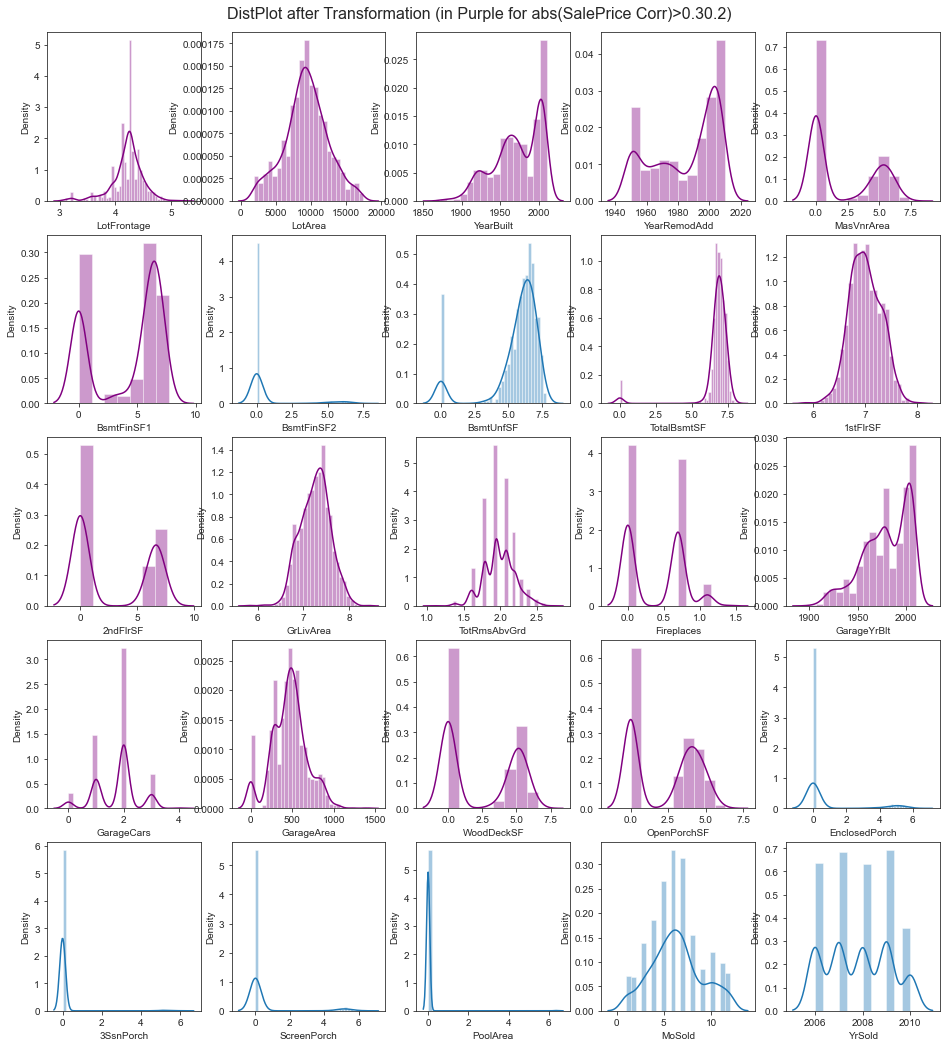

In [69]:
# Display the histogram plot of each continuos variable

cnt=0

title_name = 'DistPlot after Transformation (in Purple for abs(SalePrice Corr)>'+str(cutoff)+'0.2)'

fig, axes = plt.subplots(nrows, nclmn, figsize=(16, 18))
fig.suptitle(title_name, size=16, y=0.9)

for i in range(nrows):
    for j in range(nclmn):
        plt.subplot(nrows,nclmn,cnt+1)
        if num_data.columns[cnt] in list_corr:
            sb.distplot(num_data.iloc[:,cnt],color='purple')
        else:
            sb.distplot(num_data.iloc[:,cnt])  
        cnt+=1

<hr>

#### Observation:

* Mostly other than Date data, WoodenDeckSF, OpenPorchSF, MasVnrArea & Fireplaces variable, the data transformation has reduced the skewness & normalize the variables.

* However, We need filter out the outlier from `TotalBsmtSF`.

<hr>

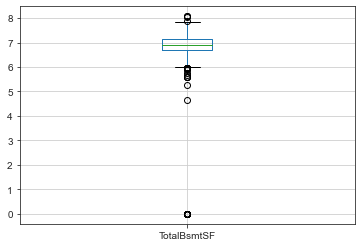

In [70]:
# Display box plot before Outlier Removal
num_data.boxplot(column=['TotalBsmtSF'])
plt.show()

In [71]:
print('Original data size: ',num_data.shape)

Original data size:  (1370, 26)


In [72]:
# Add temporary column to the df_filetred
df_filtered['TotalBsmtSF2'] = num_data["TotalBsmtSF"]

In [73]:
# Filter the data based on quantile
q_low = num_data["TotalBsmtSF"].quantile(0.05)
q_hi  = num_data["TotalBsmtSF"].quantile(0.95)
num_data = num_data[(num_data["TotalBsmtSF"] < q_hi) & (num_data["TotalBsmtSF"] > q_low)]
df_filtered = df_filtered[(df_filtered["TotalBsmtSF2"] < q_hi) & (df_filtered["TotalBsmtSF2"] > q_low)]

print('Filtered data size (Numerical Set): ',num_data.shape)
print('Filtered data size (Full Set): ',df_filtered.shape)

Filtered data size (Numerical Set):  (1229, 26)
Filtered data size (Full Set):  (1229, 72)


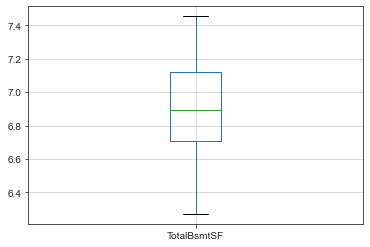

In [74]:
# Display box plot after Outlier Removal
num_data.boxplot(column=['TotalBsmtSF'])
plt.show()

In [75]:
# Drop the temporary column from df_filtered
df_filtered = df_filtered.drop(['TotalBsmtSF2'], axis=1)

__Let's check the linearity of the transformed variables__

In [76]:
num_col = num_data.select_dtypes(include=np.number).columns.tolist()

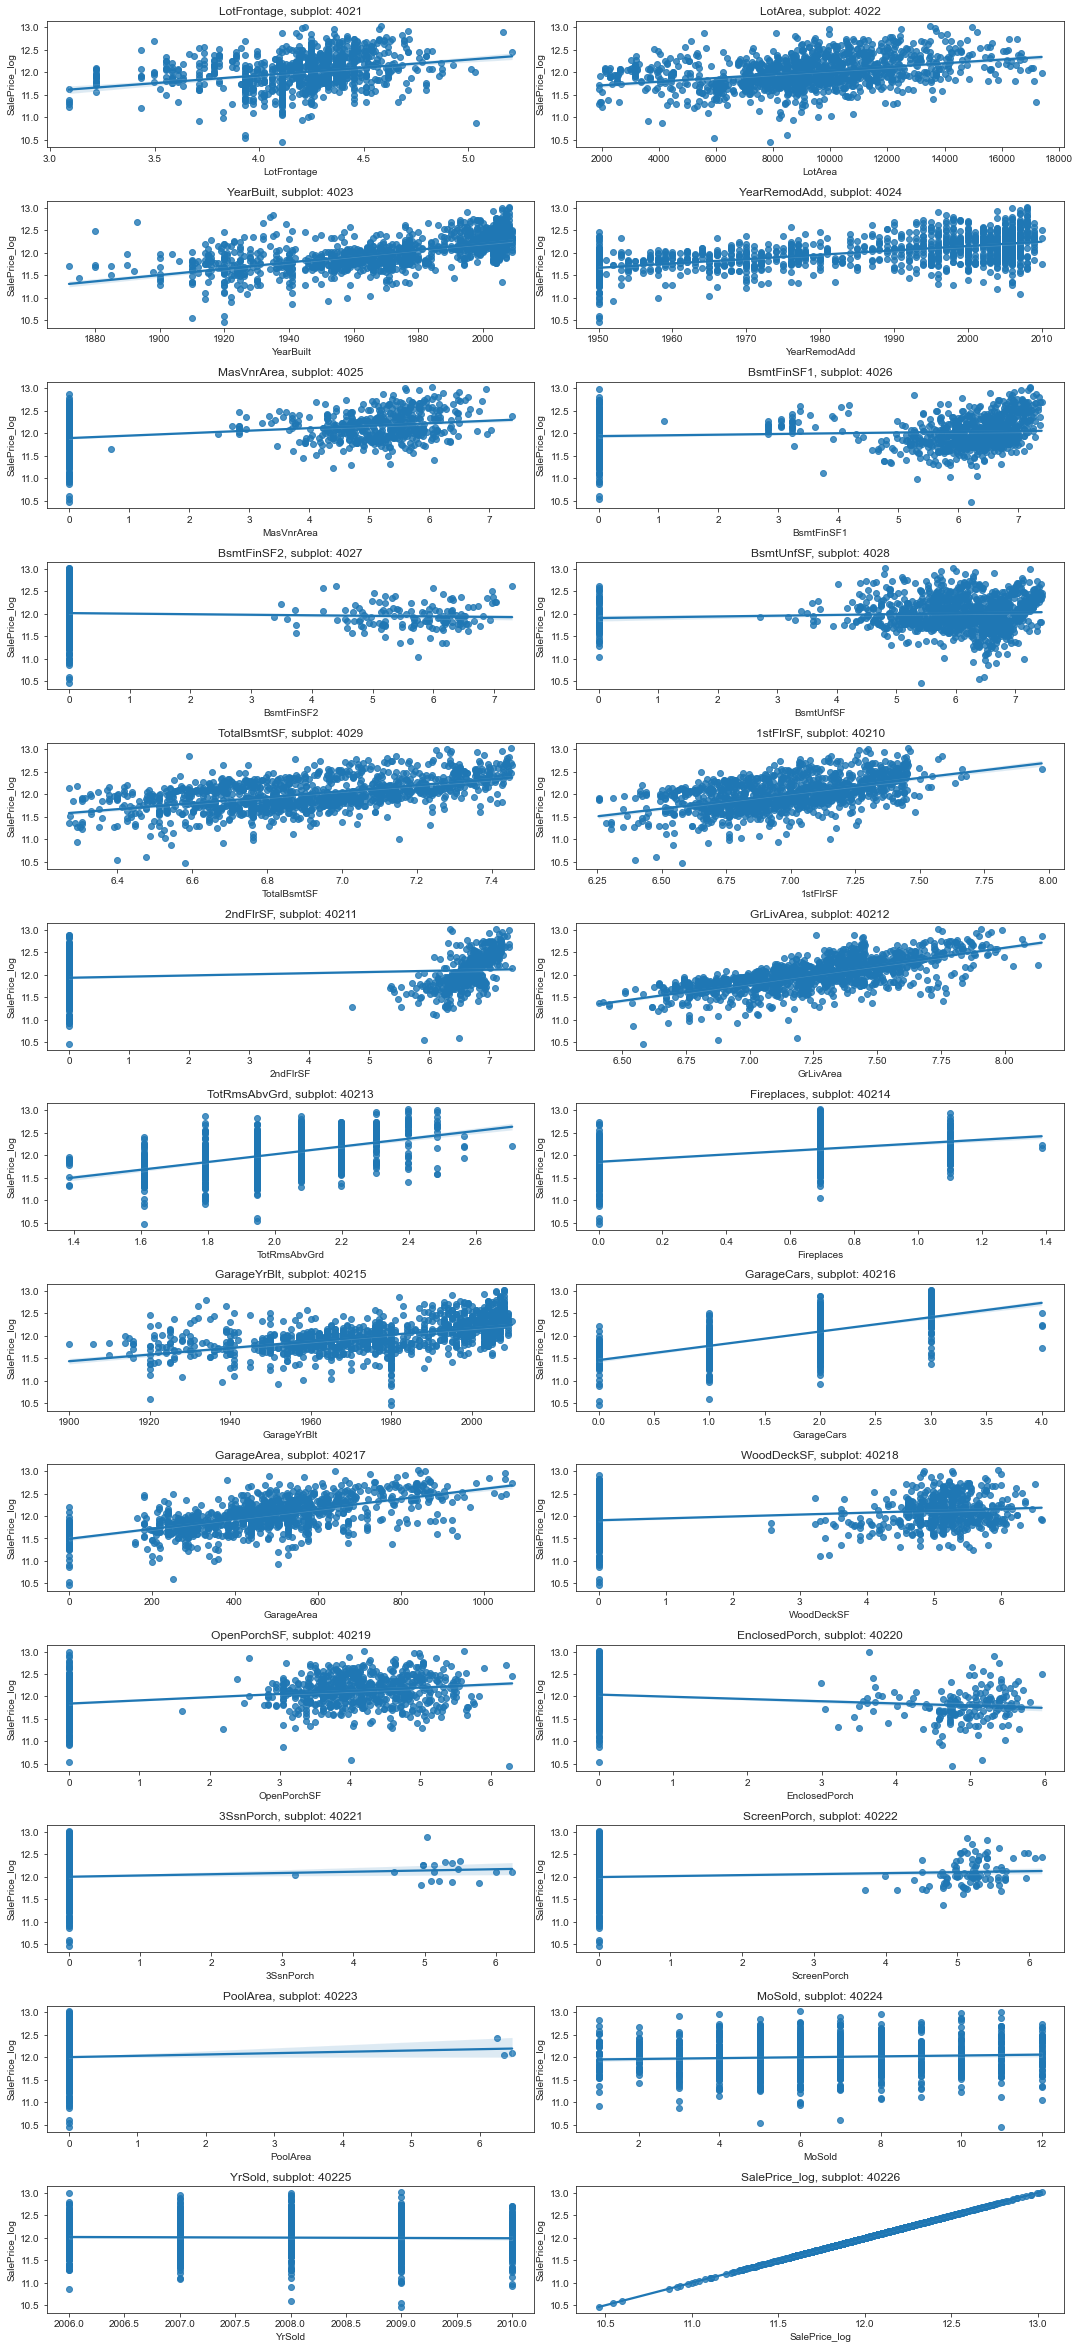

In [77]:
# Display the plot
a = 40
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in num_col:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sb.regplot(num_data[i], num_data['SalePrice_log'])
    c = c + 1

plt.tight_layout()
plt.show()

__Drop the columns (continuous variables) for the abs(correlation value) less than cutoff__ 

In [78]:
num_data_f = num_data[list_corr]
num_data_f.shape

(1229, 18)

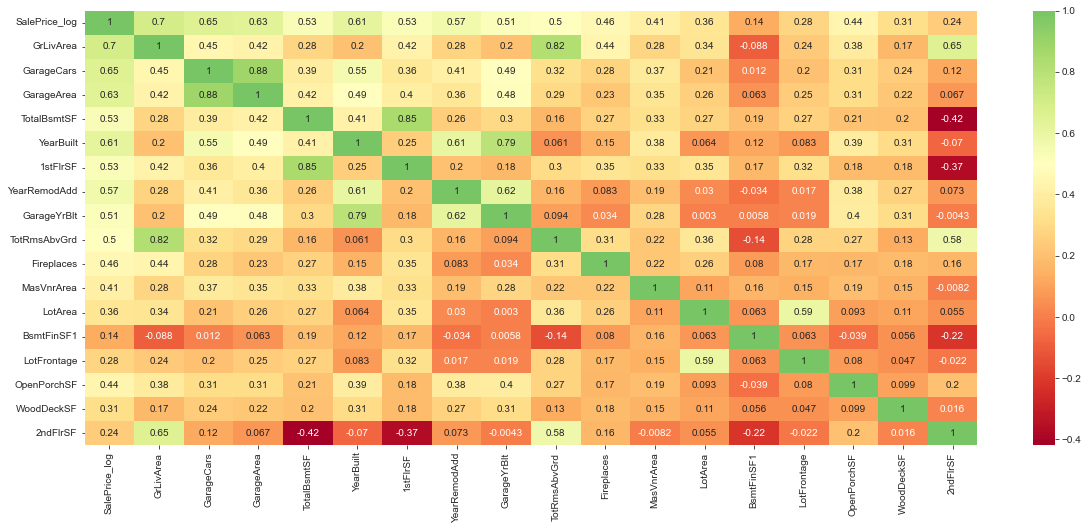

In [79]:
# Display the Heat Map of filtered data
plt.figure(figsize=(20,8))
sb.heatmap(num_data_f.corr(), annot=True, center=0.5, cmap="RdYlGn")
plt.show()

### Encoding Categorical Features - Creating Dummy Variables

In [80]:
# Create list Dataframe of Categorical Variables
total_cat_var = df_filtered.select_dtypes(include=np.object).columns.tolist()
df_cat = df_filtered[total_cat_var]
df_cat.shape

(1229, 45)

In [81]:
#convert categorical variable into dummy
df_cat = pd.get_dummies(df_cat)
df_cat.shape

(1229, 275)

In [82]:
df_cat.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-1/2 STORY-UNFINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD-1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION-ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


###  Merge Categorical & Numerical Data & Create Final DataFrame

In [83]:
df_total =  pd.concat([df_cat,num_data_f],axis=1)
df_total.shape

(1229, 293)

In [84]:
df_total.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-1/2 STORY-UNFINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD-1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION-ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,...,GarageYrBlt,TotRmsAbvGrd,Fireplaces,MasVnrArea,LotArea,BsmtFinSF1,LotFrontage,OpenPorchSF,WoodDeckSF,2ndFlrSF
0,0,0,0,0,0,0,0,0,0,1,...,2003.0,2.197225,0.000000,5.283204,8450,6.561031,4.189655,4.127134,0.000000,6.751101
1,0,0,0,1,0,0,0,0,0,0,...,1976.0,1.945910,0.693147,0.000000,9600,6.886532,4.394449,0.000000,5.700444,0.000000
2,0,0,0,0,0,0,0,0,0,1,...,2001.0,1.945910,0.693147,5.093750,11250,6.188264,4.234107,3.761200,0.000000,6.765039
3,0,0,0,0,0,0,0,0,1,0,...,1998.0,2.079442,0.693147,0.000000,9550,5.379897,4.110874,3.583519,0.000000,6.629363
4,0,0,0,0,0,0,0,0,0,1,...,2000.0,2.302585,0.693147,5.860786,14260,6.486161,4.442651,4.442651,5.262690,6.960348


### Select Target and Independent variables

In [85]:
X = df_total.drop('SalePrice_log',axis =1)
y = df_total.pop('SalePrice_log')
print('X shape',X.shape)
print('y shape',y.shape)

X shape (1229, 292)
y shape (1229,)


### Train Test Split

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
#X_train, X_test, train_labels, test_labels = train_test_split(X,y,test_size=0.3, random_state =1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =1)

In [88]:
print('X train shape',X_train.shape)
print('X test shape',X_test.shape)
print('y train shape',y_train.shape)
print('y test shape',y_test.shape)

X train shape (860, 292)
X test shape (369, 292)
y train shape (860,)
y test shape (369,)


### Feature Scaling

In [89]:
# Import the Libraries
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [90]:
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building and Evaluation

In [91]:
# Import Libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

## Linear Regression

In [92]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [93]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-594677969807.7897
[ 4.98939638e+07  4.98939634e+07  4.98939639e+07  4.98939639e+07
  4.98939639e+07  4.98939638e+07  4.98939638e+07  4.98939637e+07
  4.98939638e+07  4.98939638e+07  4.98939637e+07  1.81313703e+10
  4.98939640e+07  4.98939639e+07  4.98939638e+07  1.18789811e+10
  1.18789811e+10  1.18789811e+10  1.18789811e+10  1.18789811e+10
  3.34567779e+10  3.34567779e+10  2.22367438e+10  2.22367438e+10
  2.22367438e+10  2.22367438e+10 -2.03148124e+10 -2.03148124e+10
 -2.03148124e+10 -2.03148124e+10  8.46078452e+09  8.46078452e+09
  1.12886281e+10  1.12886281e+10  1.12886281e+10  1.12886281e+10
  1.12886281e+10 -2.65585275e+10 -2.65585275e+10 -2.65585275e+10
  2.40400542e+10  2.40400542e+10  2.40400542e+10  2.40400542e+10
  2.40400542e+10  2.40400542e+10  2.40400542e+10  2.40400542e+10
  2.40400542e+10  2.40400542e+10  2.40400542e+10  2.40400542e+10
  2.40400542e+10  2.40400542e+10  2.40400542e+10  2.40400542e+10
  2.40400542e+10  2.40400542e+10  2.40400542e+10  2.40400542e+10
  2.40

In [94]:
# Lets calculate some metrics such as R2 score, RSS and RMSE - Linear Regression
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_LR = ',round(r2_train_lr,2))
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_LR = ',round(r2_test_lr,2))
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss_[ytrain-ytrain(pred)]_LR = ',round(rss1_lr,2))
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss_[ytest-ytrain(pred])_LR = ',round(rss2_lr,2))
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_LR = ',round(mse_train_lr,2))
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_LR = ',round(mse_test_lr,2))
metric.append(mse_test_lr**0.5)

r2_train_LR =  0.95
r2_test_LR =  -1.402393870225011e+20
rss_[ytrain-ytrain(pred)]_LR =  4.86
rss_[ytest-ytrain(pred])_LR =  7.452360148146218e+21
mse_train_LR =  0.01
mse_test_LR =  2.0196097962455876e+19


* Prediction Vs Residual plot of Linear Regression model shows a linear trend, which is the violation, thus this Linear Regression cannot be accepted. Model variables must be regularized with hyperparameters.

<hr>

### Ridge Regression

In [95]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [96]:
# Printing the best hyperparameter alpha
print(model_cv_ridge.best_params_)

{'alpha': 4.0}


In [97]:
#Fitting Ridge model for alpha = 4 and printing coefficients which have been penalised
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.66024942e-02 -4.21607996e-03 -2.40789270e-02  3.44801519e-02
  9.56027856e-03 -9.59307386e-03 -6.60515697e-03  6.23913940e-03
  4.23107832e-02 -5.63589678e-03 -6.29613677e-02  5.58063711e-04
  4.42097179e-02  1.53794042e-02 -1.30445424e-02 -1.21769548e-01
  4.76539358e-02  5.73563128e-02  3.17679045e-02 -1.50086050e-02
 -3.66545129e-02  3.66545129e-02 -1.41197921e-02 -2.70906967e-04
  6.41806261e-03  7.97263645e-03  3.12561735e-03  9.99067167e-04
 -8.18657964e-03  4.06189512e-03  1.43344743e-02 -1.43344743e-02
  1.27666498e-02  1.99299900e-02 -3.48542640e-02  1.38758014e-03
  7.70044000e-04  2.53436350e-03  9.35946250e-03 -1.18938260e-02
 -1.80931775e-02  1.54549908e-02 -6.70746417e-03  7.89393685e-02
  3.38585336e-03 -2.23694472e-02  1.01152956e-01 -8.04551041e-02
 -3.29003996e-02 -8.29671352e-03 -8.38866442e-02 -2.37678438e-02
 -1.65960454e-02  1.56801301e-02 -2.86779209e-02  5.08083610e-02
  2.18326217e-02 -2.03164135e-02  1.36101166e-02 -2.51746551e-02
 -1.57686365e-02  3.25103

In [98]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

precision = 5

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_ridge = ',round(r2_train_lr,precision))
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_ridge = ',round(r2_test_lr,precision))
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss_[ytrain-ytrain(pred)]_ridge = ',round(rss1_lr,precision))
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss_[ytest-ytrain(pred])_ridge = ',round(rss2_lr,precision))
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_ridge = ',round(mse_train_lr,precision))
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_ridge = ',round(mse_test_lr,precision))
metric2.append(mse_test_lr**0.5)

r2_train_ridge =  0.93653
r2_test_ridge =  0.87799
rss_[ytrain-ytrain(pred)]_ridge =  6.06945
rss_[ytest-ytrain(pred])_ridge =  6.48379
mse_train_ridge =  0.00706
mse_test_ridge =  0.01757


### Lasso

In [99]:
lasso = Lasso()

# cross validation
model_cv_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso.fit(X_train, y_train) 

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [100]:
# Printing the best hyperparameter alpha
print(model_cv_lasso.best_params_)

{'alpha': 0.001}


In [101]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [102]:
lasso.coef_

array([-1.53710567e-02,  0.00000000e+00, -3.03578387e-02,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        5.99055730e-03,  0.00000000e+00, -3.78801279e-02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.12366386e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -5.59539557e-02,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  8.31919345e-04, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.36906210e-03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  6.45180065e-02,
        0.00000000e+00, -0.00000000e+00,  9.68654931e-02, -5.30473411e-02,
       -0.00000000e+00, -0.00000000e+00, -1.92765853e-02, -0.00000000e+00,
        0.00000000e+00,  

In [103]:
# Lets calculate some metrics such as R2 score, RSS and RMSE - Lasso
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lasso = ',round(r2_train_lr,precision))
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lasso = ',round(r2_test_lr,precision))
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss_[ytrain-ytrain(pred)]_lasso = ',round(rss1_lr,precision))
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss_[ytest-ytrain(pred])_lasso = ',round(rss2_lr,precision))
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lasso = ',round(mse_train_lr,precision))
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lasso = ',round(mse_test_lr,precision))
metric3.append(mse_test_lr**0.5)

r2_train_lasso =  0.91773
r2_test_lasso =  0.87145
rss_[ytrain-ytrain(pred)]_lasso =  7.86699
rss_[ytest-ytrain(pred])_lasso =  6.83105
mse_train_lasso =  0.00915
mse_test_lasso =  0.01851


In [104]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = round(pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] ),precision)

rg_metric = round(pd.Series(metric2, name = 'Ridge Regression(alpha=4)'),precision)
ls_metric = round(pd.Series(metric3, name = 'Lasso Regression(alpha=0.001)'),precision)

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression(alpha=4),Lasso Regression(alpha=0.001)
0,R2 Score (Train),9.492200e-01,0.93653,0.91773
1,R2 Score (Test),-1.402394e+20,0.87799,0.87145
2,RSS (Train),4.855760e+00,6.06945,7.86699
3,RSS (Test),7.452360e+21,6.48379,6.83105
4,MSE (Train),7.514000e-02,0.08401,0.09564
5,MSE (Test),4.494007e+09,0.13256,0.13606


<hr>

#### Observation:

* From the above table, Linear Regression modelling suggest to be not a good model. Here R2 score of train & test have big difference. Just to remember here, feature elimination method may improve the quality of the Linear Regression to a certain degree, but may not be enough. Overall, it suggests for the Regularisation.

* Both regularized methods, Ridge & Lasso showing much improvement in the model over just Linear Regression model.

* R2 score of Train & Test data set suggest Lasso Regression is somewhat better than Ridge Regression.

* MSE (Train & Test data) of Lasso Regression shows some better result compared to Ridge Regression. 

<hr>

### Coefficients result of models

In [105]:
betas = pd.DataFrame(index=X.columns)

In [106]:
betas.rows = X.columns

In [107]:
betas['Ridge(alpha=4)'] = ridge.coef_.round(precision)
betas['Lasso(alpha=0.001)'] = lasso.coef_.round(precision)
betas['abs(Lasso(alpha=0.001))'] = abs(lasso.coef_.round(precision))

In [108]:
betas.head(10)

,Ridge(alpha=4),Lasso(alpha=0.001),abs(Lasso(alpha=0.001))
MSSubClass_1-1/2 STORY FINISHED ALL AGES,-0.02660,-0.01537,0.01537
MSSubClass_1-1/2 STORY-UNFINISHED ALL AGES,-0.00422,0.00000,0.00000
MSSubClass_1-STORY 1945 & OLDER,-0.02408,-0.03036,0.03036
MSSubClass_1-STORY 1946 & NEWER ALL STYLES,0.03448,0.00000,0.00000
MSSubClass_1-STORY PUD-1946 & NEWER,0.00956,0.00000,0.00000
MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,-0.00959,-0.00000,0.00000
MSSubClass_2 FAMILY CONVERSION-ALL STYLES AND AGES,-0.00661,-0.00000,0.00000
MSSubClass_2-1/2 STORY ALL AGES,0.00624,0.00000,0.00000
MSSubClass_2-STORY 1945 & OLDER,0.04231,0.00599,0.00599
MSSubClass_2-STORY 1946 & NEWER,-0.00564,0.00000,0.00000


### Doubling the alpha for Ridge & Lasso

In [109]:
#Fitting Ridge model for alpha = 8 and printing coefficients which have been penalised
alpha = 8
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train, y_train)

Ridge(alpha=8)

In [110]:
# Lets calculate some metrics such as R2 score, RSS and RMSE - Ridge
y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

metric2_2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_ridge = ',round(r2_train_lr,precision))
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_ridge = ',round(r2_test_lr,precision))
metric2_2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss_[ytrain-ytrain(pred)]_ridge = ',round(rss1_lr,precision))
metric2_2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss_[ytest-ytrain(pred])_ridge = ',round(rss2_lr,precision))
metric2_2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_ridge = ',round(mse_train_lr,precision))
metric2_2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_ridge = ',round(mse_test_lr,precision))
metric2_2.append(mse_test_lr**0.5)

r2_train_ridge =  0.9296
r2_test_ridge =  0.87718
rss_[ytrain-ytrain(pred)]_ridge =  6.73203
rss_[ytest-ytrain(pred])_ridge =  6.52648
mse_train_ridge =  0.00783
mse_test_ridge =  0.01769


In [111]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.002

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [112]:
# Lets calculate some metrics such as R2 score, RSS and RMSE - Lasso
y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

metric3_2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lasso = ',round(r2_train_lr,precision))
metric3_2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lasso = ',round(r2_test_lr,precision))
metric3_2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss_[ytrain-ytrain(pred)]_lasso = ',round(rss1_lr,precision))
metric3_2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss_[ytest-ytrain(pred])_lasso = ',round(rss2_lr,precision))
metric3_2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lasso = ',round(mse_train_lr,precision))
metric3_2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lasso = ',round(mse_test_lr,precision))
metric3_2.append(mse_test_lr**0.5)

r2_train_lasso =  0.89827
r2_test_lasso =  0.85446
rss_[ytrain-ytrain(pred)]_lasso =  9.72846
rss_[ytest-ytrain(pred])_lasso =  7.73378
mse_train_lasso =  0.01131
mse_test_lasso =  0.02096


In [113]:
# Appending the values to the table

rg_metric2 = round(pd.Series(metric2_2, name = 'Ridge Regression(alpha=8)'),precision)
ls_metric2 = round(pd.Series(metric3_2, name = 'Lasso Regression(alpha=0.002)'),precision)

final_metric2 = pd.concat([final_metric, rg_metric, ls_metric], axis = 1)

final_metric2

,Metric,Linear Regression,Ridge Regression(alpha=4),Lasso Regression(alpha=0.001),Ridge Regression(alpha=4),Lasso Regression(alpha=0.001)
0,R2 Score (Train),9.492200e-01,0.93653,0.91773,0.93653,0.91773
1,R2 Score (Test),-1.402394e+20,0.87799,0.87145,0.87799,0.87145
2,RSS (Train),4.855760e+00,6.06945,7.86699,6.06945,7.86699
3,RSS (Test),7.452360e+21,6.48379,6.83105,6.48379,6.83105
4,MSE (Train),7.514000e-02,0.08401,0.09564,0.08401,0.09564
5,MSE (Test),4.494007e+09,0.13256,0.13606,0.13256,0.13606


<hr>

#### Observation:

* __Doubling the alpha for both Ridge & Lasso do not alter the R2 score, RSS & MSE of Train & Test data.__ 


<hr>

In [114]:
# Adding the doulbe alpha coeffient to the Dataframe
betas['Ridge(alpha=8)'] = ridge2.coef_.round(precision)
betas['Lasso(alpha=0.002)'] = lasso2.coef_.round(precision)

In [115]:
sorted_betas_by_lasso = betas.sort_values('abs(Lasso(alpha=0.001))', ascending=False)
sorted_betas_by_lasso = sorted_betas_by_lasso.drop(['abs(Lasso(alpha=0.001))'], axis=1)

In [116]:
sorted_betas_by_lasso.head(100)

,Ridge(alpha=4),Lasso(alpha=0.001),Ridge(alpha=8),Lasso(alpha=0.002)
GrLivArea,0.24031,0.64401,0.18974,0.58876
TotalBsmtSF,0.16373,0.16724,0.15664,0.18490
OverallQual_Fair,-0.14159,-0.14965,-0.10890,-0.06074
GarageArea,0.10213,0.14140,0.09048,0.15210
YearRemodAdd,0.09950,0.11972,0.09390,0.12478
...,...,...,...,...
BsmtFinType2_Rec,0.00298,-0.00000,0.00185,-0.00000
BsmtFinType2_LwQ,-0.00015,0.00000,0.00436,0.00000
BsmtCond_Gd,0.03610,0.00000,0.03033,0.00000
GarageCond_Po,-0.00954,-0.00000,-0.00843,-0.00000


<hr>

#### Observation:

* __Doubling the alpha for both Ridge & Lasso change the coeffients value of the variables.__ 


<hr>

#### As Asked lets remove the first five important variables & Run the lasso regression to find next five important variables

In [117]:
list_5imp_var = ['GrLivArea', 'TotalBsmtSF', 'OverallQual_Fair', 'GarageArea', 'YearRemodAdd']

In [118]:
X2 = df_total.drop(list_5imp_var,axis =1)

In [119]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y,test_size=0.3, random_state =1)

In [120]:
print('X train shape',X_train2.shape)
print('X test shape',X_test2.shape)
print('y train shape',y_train2.shape)
print('y test shape',y_test2.shape)

X train shape (860, 287)
X test shape (369, 287)
y train shape (860,)
y test shape (369,)


* New X_train & X_test reduced by 5 from 292 to 287.

In [121]:
# Scaling the Features
X_train2 =scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

#### Rerun the lasso for reduced features 

In [122]:
lasso = Lasso()

# cross validation
model_cv_lasso2 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_lasso2.fit(X_train2, y_train2) 

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [123]:
# Printing the best hyperparameter alpha
print(model_cv_lasso2.best_params_)

{'alpha': 0.001}


In [124]:
#Fitting Lasso model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso5 = Lasso(alpha=alpha)
        
lasso5.fit(X_train2, y_train2) 

Lasso(alpha=0.001)

In [125]:
# lasso5.coef_

In [126]:
# Lets calculate some metrics such as R2 score, RSS and RMSE - Lasso
y_pred_train = lasso5.predict(X_train2)
y_pred_test = lasso5.predict(X_test2)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lasso = ',round(r2_train_lr,precision))
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lasso = ',round(r2_test_lr,precision))
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss_[ytrain-ytrain(pred)]_lasso = ',round(rss1_lr,precision))
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss_[ytest-ytrain(pred])_lasso = ',round(rss2_lr,precision))
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lasso = ',round(mse_train_lr,precision))
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lasso = ',round(mse_test_lr,precision))
metric5.append(mse_test_lr**0.5)

r2_train_lasso =  0.90471
r2_test_lasso =  0.85807
rss_[ytrain-ytrain(pred)]_lasso =  9.11281
rss_[ytest-ytrain(pred])_lasso =  7.54211
mse_train_lasso =  0.0106
mse_test_lasso =  0.02044


In [127]:
# Appending the values to the table

ls_metric5 = round(pd.Series(metric5, name = 'Lasso Regression(Reduced Feature)'),precision)

final_metric5 = pd.concat([final_metric2, ls_metric5], axis = 1)

final_metric5

,Metric,Linear Regression,Ridge Regression(alpha=4),Lasso Regression(alpha=0.001),Ridge Regression(alpha=4),Lasso Regression(alpha=0.001),Lasso Regression(Reduced Feature)
0,R2 Score (Train),9.492200e-01,0.93653,0.91773,0.93653,0.91773,0.90471
1,R2 Score (Test),-1.402394e+20,0.87799,0.87145,0.87799,0.87145,0.85807
2,RSS (Train),4.855760e+00,6.06945,7.86699,6.06945,7.86699,9.11281
3,RSS (Test),7.452360e+21,6.48379,6.83105,6.48379,6.83105,7.54211
4,MSE (Train),7.514000e-02,0.08401,0.09564,0.08401,0.09564,0.10294
5,MSE (Test),4.494007e+09,0.13256,0.13606,0.13256,0.13606,0.14297


<hr>

#### Observation:

* Features reduction (by first 5 features) change the R2 score, RSS, & MSE of the train & test data set to a minor values.

<hr>

In [128]:
betas2 = pd.DataFrame(index=X2.columns)
betas2.rows = X2.columns

In [129]:
betas2['Lasso(reduced)'] = lasso5.coef_.round(precision)
betas2['abs(Lasso(reduced))'] = abs(lasso5.coef_.round(precision))

In [130]:
sorted_betas_redu_by_lasso = betas2.sort_values('abs(Lasso(reduced))', ascending=False)
sorted_betas_redu_by_lasso = sorted_betas_redu_by_lasso.drop(['abs(Lasso(reduced))'], axis=1)

In [131]:
sorted_betas_redu_by_lasso.head(100)

,Lasso(reduced)
1stFlrSF,0.62532
OverallQual_Very Good,0.15131
GarageCars,0.14722
2ndFlrSF,0.13758
LotArea,0.12250
...,...
BedroomAbvGr_5,0.00000
BedroomAbvGr_6,0.00000
BedroomAbvGr_8,0.00000
KitchenAbvGr_0,0.00000


<hr>

#### Observation:

* According to preferable lasso modelling, for the initial case, the most important variable ranking from 6th to 10th position are follows: 
•	MSZoning_Commercial
•	LotArea
•	KitchenQual_Ex
•	OverallQual_Very Good
•	Neighborhood_Crawfor

* According to preferable lasso modelling, for the second case upon removal first five features: the following variables has become first five important variables.
•	1stFlrSF
•	OverallQual_Very Good
•	GarageCars
•	2ndFlrSF
•	LotArea


* __The model is not the unique solution, there is possibility of refinement with some interations.__

<hr>